In [1]:
import pandas as pd
import matplotlib.pyplot as plt

lettergrade_df = pd.read_excel('letter_grade_file.xlsx')
lettergrade_df.head()

,year,system,system_name,school,school_name,lg_ineligible,school_pool,grade_band_3-5,grade_band_6-8,grade_band_9-12,...,ccr_asvab_rate,ccr_rate_ed,ccr_rate_el,ccr_rate_swd,ccr_rate_aian,ccr_rate_asian,ccr_rate_black,ccr_rate_hispanic,ccr_rate_nhpi,ccr_rate_white
0,2023,10,Anderson County,2,Anderson County High School,0,HS,N,N,Y,...,18.4,61.8,Insufficient N Count,44.4,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,75.3
1,2023,10,Anderson County,3,Anderson County Career Technical Center,1,K8,N,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School
2,2023,10,Anderson County,4,Anderson County Innovation Academy,1,K8,N,Y,Y,...,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count
3,2023,10,Anderson County,5,Andersonville Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School
4,2023,10,Anderson County,10,Briceville Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School


In [2]:
lettergrade_df.shape

(1900, 74)

In [3]:
# Count the number of each type of school
school_counts = lettergrade_df['school_pool'].value_counts()

# Print the counts for each school type
print(school_counts)

K8    1539
HS     361
Name: school_pool, dtype: int64


In [4]:
#Data Cleaning
lettergrade_df.columns

Index(['year', 'system', 'system_name', 'school', 'school_name',
       'lg_ineligible', 'school_pool', 'grade_band_3-5', 'grade_band_6-8',
       'grade_band_9-12', 'ach_score', 'growth_score', 'growth25_score',
       'ccr_score', 'ach_score_weighted', 'growth_score_weighted',
       'growth25_score_weighted', 'ccr_score_weighted', 'ach_weight',
       'growth_weight', 'growth25_weight', 'ccr_weight', 'lg_score',
       'lg_grade', 'overall_success_rate_all_students',
       'overall_success_rate_ed', 'overall_success_rate_el',
       'overall_success_rate_swd', 'overall_success_rate_aian',
       'overall_success_rate_asian', 'overall_success_rate_black',
       'overall_success_rate_hispanic', 'overall_success_rate_nhpi',
       'overall_success_rate_white', 'success_rate_g3-5_ela',
       'success_rate_g3-5_math', 'success_rate_g3-5_science',
       'success_rate_g6-8_ela', 'success_rate_g6-8_math',
       'success_rate_g6-8_science', 'success_rate_g6-8_social_studies',
       'su

In [5]:
lettergrade_df[['overall_success_rate_all_students', 'growth_score', 'growth25_score', 'lg_score']].describe()

,overall_success_rate_all_students,growth_score,growth25_score,lg_score
count,1900,1900,1900,1900
unique,624,6,6,42
top,Insufficient N Count,5,3,Not Eligible for a Letter Grade
freq,201,548,632,210


In [6]:
#Data Cleaning - Count Not Eligibles
not_eligible_count = lettergrade_df[lettergrade_df['lg_grade'] == 'Not Eligible for a Letter Grade'].shape[0]
print(not_eligible_count)

210


In [7]:
#Data Cleaning - Remove Not Eligibles
filtered_df = lettergrade_df[lettergrade_df['lg_grade'] != 'Not Eligible for a Letter Grade']
filtered_df.head()

,year,system,system_name,school,school_name,lg_ineligible,school_pool,grade_band_3-5,grade_band_6-8,grade_band_9-12,...,ccr_asvab_rate,ccr_rate_ed,ccr_rate_el,ccr_rate_swd,ccr_rate_aian,ccr_rate_asian,ccr_rate_black,ccr_rate_hispanic,ccr_rate_nhpi,ccr_rate_white
0,2023,10,Anderson County,2,Anderson County High School,0,HS,N,N,Y,...,18.4,61.8,Insufficient N Count,44.4,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,75.3
3,2023,10,Anderson County,5,Andersonville Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School
4,2023,10,Anderson County,10,Briceville Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School
5,2023,10,Anderson County,15,Claxton Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School
6,2023,10,Anderson County,20,Clinton Middle School,0,K8,N,Y,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School


In [8]:
filtered_df.shape

(1690, 74)

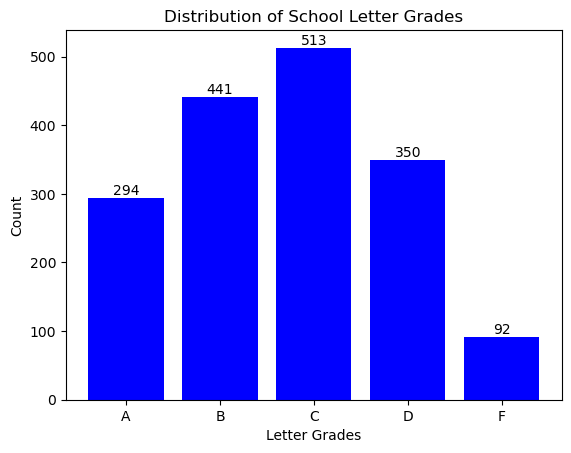

In [9]:
import matplotlib.pyplot as plt

# Assuming grade_counts contains the counts for each grade
grade_counts = filtered_df['lg_grade'].value_counts()

# Sorting the index if you want the grades in a specific order
grade_counts = grade_counts.reindex(['A', 'B', 'C', 'D', 'F'])

# Creating the bar chart
bars = plt.bar(grade_counts.index, grade_counts.values, color='blue')

# Adding data labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel('Letter Grades')
plt.ylabel('Count')
plt.title('Distribution of School Letter Grades')
plt.show()


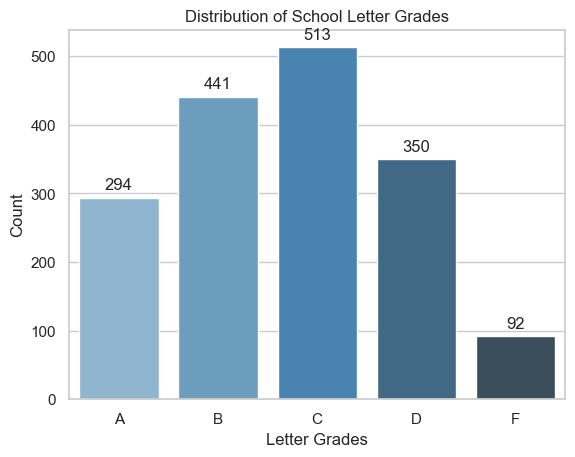

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming grade_counts contains the counts for each grade
grade_counts = filtered_df['lg_grade'].value_counts()

# Sorting the index if you want the grades in a specific order
grade_counts = grade_counts.reindex(['A', 'B', 'C', 'D', 'F'])

# Setting a Seaborn style for aesthetics
sns.set(style="whitegrid")

# Creating the bar chart using Seaborn's barplot for a more refined look
ax = sns.barplot(x=grade_counts.index, y=grade_counts.values, palette="Blues_d")

# Adding data labels to each bar. Note: sns.barplot() returns an Axes object, not bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.xlabel('Letter Grades')
plt.ylabel('Count')
plt.title('Distribution of School Letter Grades')
plt.show()


In [11]:
# Counting each grade
grade_counts = filtered_df['lg_grade'].value_counts()

# Calculating percentages
total_grades = grade_counts.sum()
grade_percentages = (grade_counts / total_grades) * 100

# Combining counts and percentages
grade_summary = pd.DataFrame({
    'Count': grade_counts,
    'Percentage': grade_percentages
})

# Sorting the index if needed
grade_summary = grade_summary.reindex(['A', 'B', 'C', 'D', 'F'])

print(grade_summary)


   Count  Percentage
A    294   17.396450
B    441   26.094675
C    513   30.355030
D    350   20.710059
F     92    5.443787


In [12]:
filtered_df['ach_score'].unique()

array(['4', '5', '3', '2', '1', '3.3', '2.5', '2.3', '1.9', '2.4', '3.4',
       '4.1', '2.7', '2.9', '3.6', '3.7', '4.7', '3.9', '4.5', '4.4',
       '4.8', '3.5', '2.6', '4.2', '1.7', '3.8', '2.1', '1.1', '1.8',
       '1.4', '3.2', '1.6', '1.5', '1.3', '2.2', '4.3', '2.8', '1.2'],
      dtype=object)

In [13]:
# Convert 'ach_score', 'growth_score', and 'growth25_score' to floats
filtered_df['ach_score'] = pd.to_numeric(filtered_df['ach_score'], errors='coerce')
filtered_df['growth_score'] = pd.to_numeric(filtered_df['growth_score'], errors='coerce')
filtered_df['growth25_score'] = pd.to_numeric(filtered_df['growth25_score'], errors='coerce')

# Recalculating the means
average_ach_score = filtered_df.groupby('lg_grade')['ach_score'].mean()
average_growth_score = filtered_df.groupby('lg_grade')['growth_score'].mean()
average_growth25_score = filtered_df.groupby('lg_grade')['growth25_score'].mean()

# Display the results
print("Average Achievement Scores by Letter Grade:\n", average_ach_score)
print("\nAverage Growth Scores by Letter Grade:\n", average_growth_score)
print("\nAverage Growth25 Scores by Letter Grade:\n", average_growth25_score)

Average Achievement Scores by Letter Grade:
 lg_grade
A    4.849320
B    3.948299
C    2.957310
D    2.001429
F    1.020652
Name: ach_score, dtype: float64

Average Growth Scores by Letter Grade:
 lg_grade
A    4.955782
B    3.918367
C    2.801170
D    1.617143
F    1.000000
Name: growth_score, dtype: float64

Average Growth25 Scores by Letter Grade:
 lg_grade
A    4.454861
B    3.575058
C    3.101594
D    2.644377
F    3.209302
Name: growth25_score, dtype: float64


/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_31626/460640955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ach_score'] = pd.to_numeric(filtered_df['ach_score'], errors='coerce')
/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_31626/460640955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['growth_score'] = pd.to_numeric(filtered_df['growth_score'], errors='coerce')
/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_31626/460640955.py:4: Set

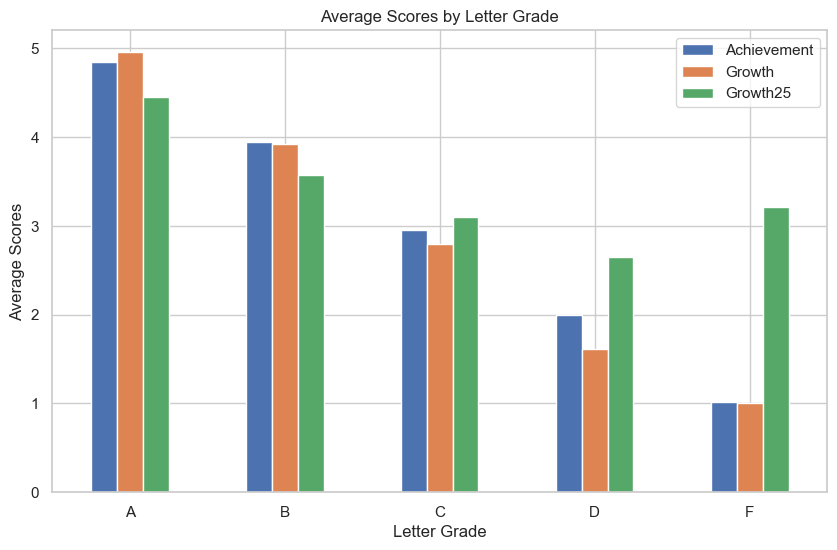

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming average_ach_score, average_growth_score, and average_growth25_score are your DataFrames

# Combining the average scores into a single DataFrame
combined_scores = pd.DataFrame({
    'Achievement': average_ach_score,
    'Growth': average_growth_score,
    'Growth25': average_growth25_score
})

# Resetting index to get 'lg_grade' as a column
combined_scores.reset_index(inplace=True)

# Plotting
ax = combined_scores.plot(x='lg_grade', kind='bar', figsize=(10, 6), rot=0)

# Adding labels and title
ax.set_xlabel('Letter Grade')
ax.set_ylabel('Average Scores')
ax.set_title('Average Scores by Letter Grade')

# Showing the plot
plt.show()


In [15]:
# Assuming 'lettergrade_df' is your original DataFrame and has all the required columns
df_filtered_raw = lettergrade_df[['overall_success_rate_all_students', 'growth_numeracy_score', 
                                  'growth_literacy_score', 'lg_score', 'lg_grade']].copy()

# Display the first few rows of the new DataFrame to verify it looks correct
print(df_filtered_raw.head())


  overall_success_rate_all_students growth_numeracy_score  \
0                              34.2                     5   
1              Insufficient N Count  Insufficient N Count   
2              Insufficient N Count  Insufficient N Count   
3                              52.2                     5   
4                              30.5                     2   

  growth_literacy_score                         lg_score  \
0                     1                              3.7   
1  Insufficient N Count  Not Eligible for a Letter Grade   
2  Insufficient N Count  Not Eligible for a Letter Grade   
3                     3                              4.4   
4                     3                              2.5   

                          lg_grade  
0                                B  
1  Not Eligible for a Letter Grade  
2  Not Eligible for a Letter Grade  
3                                B  
4                                C  


In [16]:
import pandas as pd
import numpy as np

# Assuming 'df_filtered_raw' is your original DataFrame

# Replace 'Insufficient N Count' with NaN
df_filtered_raw.replace('Insufficient N Count', np.nan, inplace=True)

# Drop rows with any NaN values
df_filtered_cleaned_raw = df_filtered_raw.dropna()

# Display the first few rows of the cleaned DataFrame to verify
print(df_filtered_cleaned_raw.head())


  overall_success_rate_all_students growth_numeracy_score  \
0                              34.2                     5   
3                              52.2                     5   
4                              30.5                     2   
5                              33.6                     3   
6                              30.1                     1   

  growth_literacy_score lg_score lg_grade  
0                     1      3.7        B  
3                     3      4.4        B  
4                     3      2.5        C  
5                     4      3.8        B  
6                     2      2.2        D  


In [17]:
# First, ensure the 'growth_numeracy_score', 'growth_literacy_score', and 'lg_score' are numeric
df_filtered_cleaned_raw['overall_success_rate_all_students'] = pd.to_numeric(df_filtered_cleaned_raw['overall_success_rate_all_students'], errors='coerce')
df_filtered_cleaned_raw['growth_numeracy_score'] = pd.to_numeric(df_filtered_cleaned_raw['growth_numeracy_score'], errors='coerce')
df_filtered_cleaned_raw['growth_literacy_score'] = pd.to_numeric(df_filtered_cleaned_raw['growth_literacy_score'], errors='coerce')
df_filtered_cleaned_raw['lg_score'] = pd.to_numeric(df_filtered_cleaned_raw['lg_score'], errors='coerce')

# Drop any rows that now contain NaNs after the conversion
df_filtered_cleaned_raw = df_filtered_cleaned_raw.dropna(subset=['overall_success_rate_all_students', 'growth_numeracy_score', 'growth_literacy_score', 'lg_score'])

# Now calculate the mean, ensuring that we ignore any remaining non-numeric data
average_scores_by_grade_raw = df_filtered_cleaned_raw.groupby('lg_grade').mean()

print(average_scores_by_grade_raw)



          overall_success_rate_all_students  growth_numeracy_score  \
lg_grade                                                             
A                                 57.341034               4.448276   
B                                 43.865760               3.721088   
C                                 32.723392               2.941520   
D                                 22.764535               1.875000   
F                                 11.665854               1.548780   

          growth_literacy_score  lg_score  
lg_grade                                   
A                      4.106897  4.845172  
B                      3.358277  3.903855  
C                      2.922027  2.920663  
D                      2.313953  1.945640  
F                      1.914634  1.228049  


/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_31626/3193237158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_cleaned_raw['overall_success_rate_all_students'] = pd.to_numeric(df_filtered_cleaned_raw['overall_success_rate_all_students'], errors='coerce')
/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_31626/3193237158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_cleaned_raw['growth_numeracy_score'] = pd.to_numeric(df_filtered_cleaned_raw['growth_num

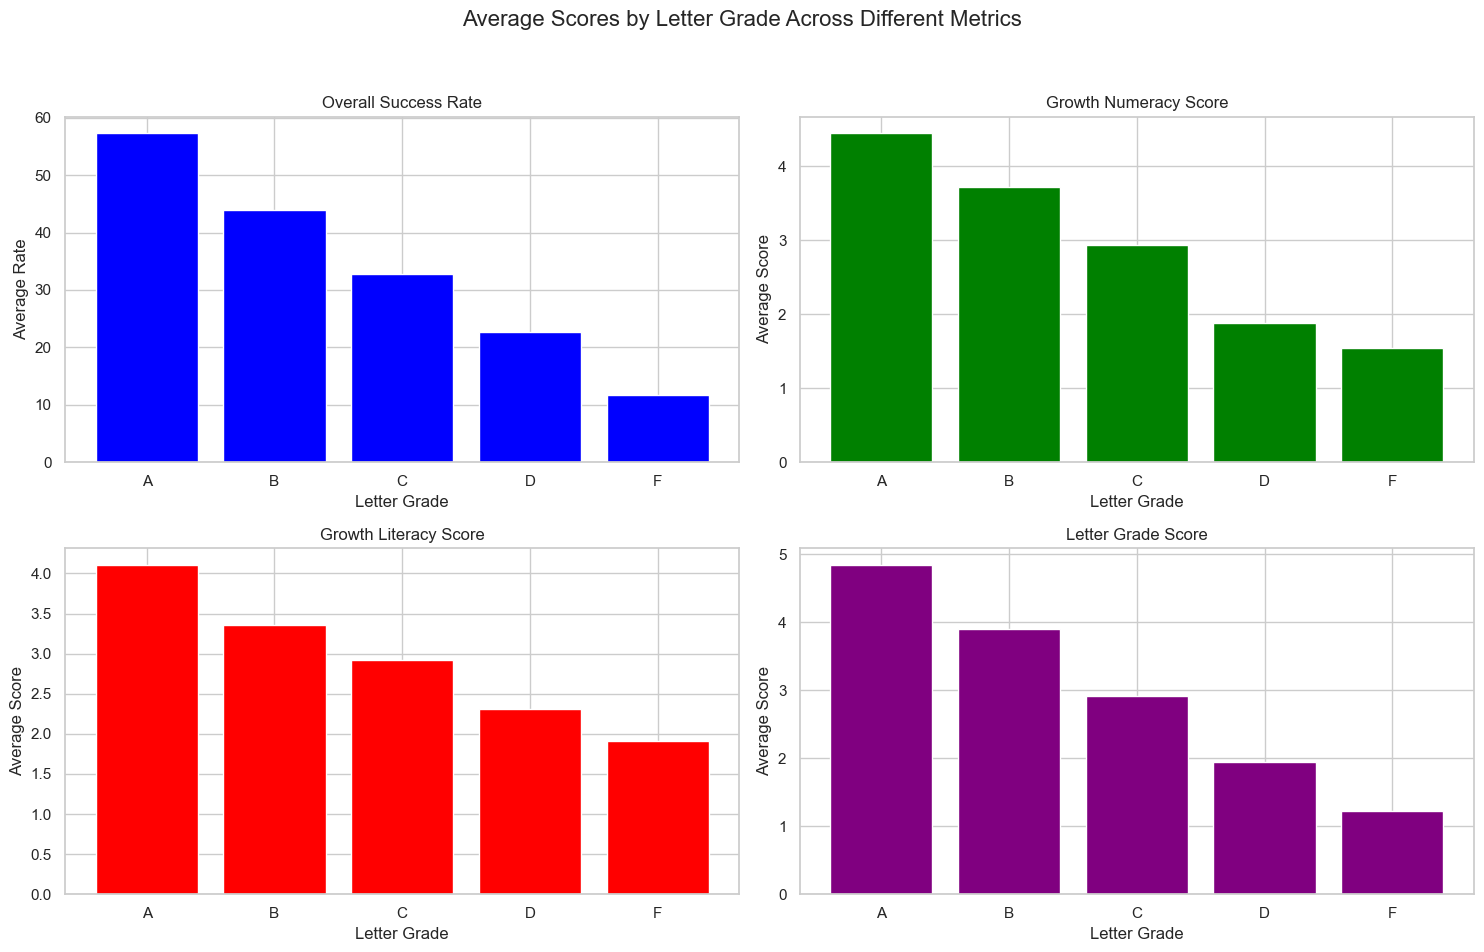

In [18]:
import matplotlib.pyplot as plt

# Assuming df_filtered_cleaned_raw is your DataFrame and it's properly formatted

# Group by 'lg_grade' and calculate the mean
grouped_data = df_filtered_cleaned_raw.groupby('lg_grade').mean()

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # Adjust the size as needed
fig.suptitle('Average Scores by Letter Grade Across Different Metrics', fontsize=16)

# Overall Success Rate Bar Chart
axes[0, 0].bar(grouped_data.index, grouped_data['overall_success_rate_all_students'], color='blue')
axes[0, 0].set_title('Overall Success Rate')
axes[0, 0].set_xlabel('Letter Grade')
axes[0, 0].set_ylabel('Average Rate')

# Growth Numeracy Score Bar Chart
axes[0, 1].bar(grouped_data.index, grouped_data['growth_numeracy_score'], color='green')
axes[0, 1].set_title('Growth Numeracy Score')
axes[0, 1].set_xlabel('Letter Grade')
axes[0, 1].set_ylabel('Average Score')

# Growth Literacy Score Bar Chart
axes[1, 0].bar(grouped_data.index, grouped_data['growth_literacy_score'], color='red')
axes[1, 0].set_title('Growth Literacy Score')
axes[1, 0].set_xlabel('Letter Grade')
axes[1, 0].set_ylabel('Average Score')

# LG Score Bar Chart
axes[1, 1].bar(grouped_data.index, grouped_data['lg_score'], color='purple')
axes[1, 1].set_title('Letter Grade Score')
axes[1, 1].set_xlabel('Letter Grade')
axes[1, 1].set_ylabel('Average Score')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show plot
plt.show()


In [21]:
school_profiles_df = pd.read_excel('school_profiles_2.xlsx')
school_profiles_df.head()

,school_year,district_id,district_name,school_id,school_name,total,african_american_pct,asian_pct,black_hispanic_native_american_pct,economically_disadvantaged_pct,...,hispanic_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct
0,2022-23,10,Anderson County,2,Anderson County High School,1036,Less than 5%,Less than 5%,6,21,...,Less than 5%,Less than 5%,Less than 5%,54,Fewer than 10 students,Fewer than 10 students,Less than 5%,Less than 5%,15,93
1,2022-23,10,Anderson County,4,Anderson County Innovation Academy,23,Fewer than 10 students,Fewer than 10 students,9,22,...,9,Fewer than 10 students,Less than 5%,48,Fewer than 10 students,Fewer than 10 students,9,Fewer than 10 students,13,91
2,2022-23,10,Anderson County,5,Andersonville Elementary,297,Less than 5%,Less than 5%,7,27,...,Less than 5%,Less than 5%,Less than 5%,49,Fewer than 10 students,Fewer than 10 students,5,Less than 5%,20,92
3,2022-23,10,Anderson County,10,Briceville Elementary,98,Less than 5%,Fewer than 10 students,5,54,...,Fewer than 10 students,Less than 5%,Fewer than 10 students,48,Fewer than 10 students,Fewer than 10 students,Less than 5%,Less than 5%,24,95
4,2022-23,10,Anderson County,15,Claxton Elementary,456,7,Less than 5%,17,44,...,11,Less than 5%,9,50,Fewer than 10 students,Fewer than 10 students,14,Fewer than 10 students,20,82


In [22]:
filtered_df['primary_key'] = filtered_df['system'].astype(str) + '-' + filtered_df['school'].astype(str)
school_profiles_df['primary_key'] = school_profiles_df['district_id'].astype(str) + '-' + school_profiles_df['school_id'].astype(str)

/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_31626/3449049240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['primary_key'] = filtered_df['system'].astype(str) + '-' + filtered_df['school'].astype(str)


In [23]:
filtered_df.head()

,year,system,system_name,school,school_name,lg_ineligible,school_pool,grade_band_3-5,grade_band_6-8,grade_band_9-12,...,ccr_rate_ed,ccr_rate_el,ccr_rate_swd,ccr_rate_aian,ccr_rate_asian,ccr_rate_black,ccr_rate_hispanic,ccr_rate_nhpi,ccr_rate_white,primary_key
0,2023,10,Anderson County,2,Anderson County High School,0,HS,N,N,Y,...,61.8,Insufficient N Count,44.4,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,75.3,10-2
3,2023,10,Anderson County,5,Andersonville Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,10-5
4,2023,10,Anderson County,10,Briceville Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,10-10
5,2023,10,Anderson County,15,Claxton Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,10-15
6,2023,10,Anderson County,20,Clinton Middle School,0,K8,N,Y,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,10-20


In [24]:
school_profiles_df

,school_year,district_id,district_name,school_id,school_name,total,african_american_pct,asian_pct,black_hispanic_native_american_pct,economically_disadvantaged_pct,...,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct,primary_key
0,2022-23,10,Anderson County,2,Anderson County High School,1036,Less than 5%,Less than 5%,6,21,...,Less than 5%,Less than 5%,54,Fewer than 10 students,Fewer than 10 students,Less than 5%,Less than 5%,15,93,10-2
1,2022-23,10,Anderson County,4,Anderson County Innovation Academy,23,Fewer than 10 students,Fewer than 10 students,9,22,...,Fewer than 10 students,Less than 5%,48,Fewer than 10 students,Fewer than 10 students,9,Fewer than 10 students,13,91,10-4
2,2022-23,10,Anderson County,5,Andersonville Elementary,297,Less than 5%,Less than 5%,7,27,...,Less than 5%,Less than 5%,49,Fewer than 10 students,Fewer than 10 students,5,Less than 5%,20,92,10-5
3,2022-23,10,Anderson County,10,Briceville Elementary,98,Less than 5%,Fewer than 10 students,5,54,...,Less than 5%,Fewer than 10 students,48,Fewer than 10 students,Fewer than 10 students,Less than 5%,Less than 5%,24,95,10-10
4,2022-23,10,Anderson County,15,Claxton Elementary,456,7,Less than 5%,17,44,...,Less than 5%,9,50,Fewer than 10 students,Fewer than 10 students,14,Fewer than 10 students,20,82,10-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-23,987,Tennessee Public Charter School Commission,8035,Cornerstone Prep School,33,73,Less than 5%,88,46,...,Fewer than 10 students,12,54,Fewer than 10 students,Fewer than 10 students,15,Fewer than 10 students,27,9,987-8035
1822,2022-23,987,Tennessee Public Charter School Commission,8045,Rocketship NSH3 Antioch,340,52,Less than 5%,94,26,...,Fewer than 10 students,38,46,Fewer than 10 students,Fewer than 10 students,44,Fewer than 10 students,9,6,987-8045
1823,2022-23,987,Tennessee Public Charter School Commission,8070,Lester Prep,211,93,Fewer than 10 students,More than 95%,82,...,Less than 5%,Less than 5%,46,Fewer than 10 students,Fewer than 10 students,5,Less than 5%,15,Less than 5%,987-8070
1824,2022-23,987,Tennessee Public Charter School Commission,8095,Libertas,396,82,Less than 5%,86,58,...,Less than 5%,Less than 5%,54,Fewer than 10 students,Fewer than 10 students,Less than 5%,Fewer than 10 students,19,13,987-8095


In [25]:
# Rename 'district_name' to 'system_name' in school_profiles_df
school_profiles_df.rename(columns={'district_name': 'system_name'}, inplace=True)

# Verify the change
school_profiles_df.head()

,school_year,district_id,system_name,school_id,school_name,total,african_american_pct,asian_pct,black_hispanic_native_american_pct,economically_disadvantaged_pct,...,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct,primary_key
0,2022-23,10,Anderson County,2,Anderson County High School,1036,Less than 5%,Less than 5%,6,21,...,Less than 5%,Less than 5%,54,Fewer than 10 students,Fewer than 10 students,Less than 5%,Less than 5%,15,93,10-2
1,2022-23,10,Anderson County,4,Anderson County Innovation Academy,23,Fewer than 10 students,Fewer than 10 students,9,22,...,Fewer than 10 students,Less than 5%,48,Fewer than 10 students,Fewer than 10 students,9,Fewer than 10 students,13,91,10-4
2,2022-23,10,Anderson County,5,Andersonville Elementary,297,Less than 5%,Less than 5%,7,27,...,Less than 5%,Less than 5%,49,Fewer than 10 students,Fewer than 10 students,5,Less than 5%,20,92,10-5
3,2022-23,10,Anderson County,10,Briceville Elementary,98,Less than 5%,Fewer than 10 students,5,54,...,Less than 5%,Fewer than 10 students,48,Fewer than 10 students,Fewer than 10 students,Less than 5%,Less than 5%,24,95,10-10
4,2022-23,10,Anderson County,15,Claxton Elementary,456,7,Less than 5%,17,44,...,Less than 5%,9,50,Fewer than 10 students,Fewer than 10 students,14,Fewer than 10 students,20,82,10-15


In [26]:
school_profiles_df.shape

(1826, 24)

In [27]:
# List of columns you want to keep
columns_to_keep =  ['total', 'african_american_pct', 'asian_pct',
                   'black_hispanic_native_american_pct', 'economically_disadvantaged_pct', 
                   'homeless_pct', 'limited_english_proficient_pct', 'male_pct', 'migrant_pct',
                   'military_pct', 'multirace_pct', 'native_american_pct', 
                   'students_with_disabilities_pct', 'white_pct', 'primary_key']

# Keep only these columns in school_profiles_df
school_profiles_df = school_profiles_df[columns_to_keep]

# Verify the change
school_profiles_df.head(10)


,total,african_american_pct,asian_pct,black_hispanic_native_american_pct,economically_disadvantaged_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct,primary_key
0,1036,Less than 5%,Less than 5%,6,21,Less than 5%,Less than 5%,54,Fewer than 10 students,Fewer than 10 students,Less than 5%,Less than 5%,15,93,10-2
1,23,Fewer than 10 students,Fewer than 10 students,9,22,Fewer than 10 students,Less than 5%,48,Fewer than 10 students,Fewer than 10 students,9,Fewer than 10 students,13,91,10-4
2,297,Less than 5%,Less than 5%,7,27,Less than 5%,Less than 5%,49,Fewer than 10 students,Fewer than 10 students,5,Less than 5%,20,92,10-5
3,98,Less than 5%,Fewer than 10 students,5,54,Less than 5%,Fewer than 10 students,48,Fewer than 10 students,Fewer than 10 students,Less than 5%,Less than 5%,24,95,10-10
4,456,7,Less than 5%,17,44,Less than 5%,9,50,Fewer than 10 students,Fewer than 10 students,14,Fewer than 10 students,20,82,10-15
5,603,6,Less than 5%,12,36,Less than 5%,Less than 5%,50,Fewer than 10 students,Fewer than 10 students,9,Less than 5%,14,87,10-20
6,1126,6,Less than 5%,12,30,Less than 5%,Less than 5%,51,Fewer than 10 students,Fewer than 10 students,9,Less than 5%,15,86,10-25
7,114,Less than 5%,Less than 5%,Less than 5%,32,Fewer than 10 students,Less than 5%,54,Less than 5%,Fewer than 10 students,Less than 5%,Fewer than 10 students,23,94,10-35
8,254,Less than 5%,Less than 5%,Less than 5%,22,Fewer than 10 students,Less than 5%,56,Fewer than 10 students,Fewer than 10 students,Less than 5%,Less than 5%,24,95,10-40
9,298,Less than 5%,Less than 5%,10,31,Less than 5%,Fewer than 10 students,49,Fewer than 10 students,Fewer than 10 students,9,Less than 5%,23,90,10-46


In [28]:
import pandas as pd

# Replace "Less than 5%" with 4.5 in all columns
school_profiles_df = school_profiles_df.replace('Less than 5%', 2.5)
school_profiles_df = school_profiles_df.replace('More than 95%', 97.5)

# Convert columns to numeric if they are not already
percentage_columns = ['african_american_pct', 'asian_pct', 'black_hispanic_native_american_pct', 
                      'economically_disadvantaged_pct', 'homeless_pct', 
                      'limited_english_proficient_pct', 'male_pct', 'migrant_pct', 'military_pct', 
                      'multirace_pct', 'native_american_pct', 'students_with_disabilities_pct', 
                      'white_pct']
school_profiles_df[percentage_columns] = school_profiles_df[percentage_columns].apply(pd.to_numeric, errors='coerce')

# Verify the change
school_profiles_df.head(10)


,total,african_american_pct,asian_pct,black_hispanic_native_american_pct,economically_disadvantaged_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct,primary_key
0,1036,2.5,2.5,6.0,21.0,2.5,2.5,54.0,NaN,NaN,2.5,2.5,15.0,93.0,10-2
1,23,NaN,NaN,9.0,22.0,NaN,2.5,48.0,NaN,NaN,9.0,NaN,13.0,91.0,10-4
2,297,2.5,2.5,7.0,27.0,2.5,2.5,49.0,NaN,NaN,5.0,2.5,20.0,92.0,10-5
3,98,2.5,NaN,5.0,54.0,2.5,NaN,48.0,NaN,NaN,2.5,2.5,24.0,95.0,10-10
4,456,7.0,2.5,17.0,44.0,2.5,9.0,50.0,NaN,NaN,14.0,NaN,20.0,82.0,10-15
5,603,6.0,2.5,12.0,36.0,2.5,2.5,50.0,NaN,NaN,9.0,2.5,14.0,87.0,10-20
6,1126,6.0,2.5,12.0,30.0,2.5,2.5,51.0,NaN,NaN,9.0,2.5,15.0,86.0,10-25
7,114,2.5,2.5,2.5,32.0,NaN,2.5,54.0,2.5,NaN,2.5,NaN,23.0,94.0,10-35
8,254,2.5,2.5,2.5,22.0,NaN,2.5,56.0,NaN,NaN,2.5,2.5,24.0,95.0,10-40
9,298,2.5,2.5,10.0,31.0,2.5,NaN,49.0,NaN,NaN,9.0,2.5,23.0,90.0,10-46


In [29]:
filtered_df

,year,system,system_name,school,school_name,lg_ineligible,school_pool,grade_band_3-5,grade_band_6-8,grade_band_9-12,...,ccr_rate_ed,ccr_rate_el,ccr_rate_swd,ccr_rate_aian,ccr_rate_asian,ccr_rate_black,ccr_rate_hispanic,ccr_rate_nhpi,ccr_rate_white,primary_key
0,2023,10,Anderson County,2,Anderson County High School,0,HS,N,N,Y,...,61.8,Insufficient N Count,44.4,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,75.3,10-2
3,2023,10,Anderson County,5,Andersonville Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,10-5
4,2023,10,Anderson County,10,Briceville Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,10-10
5,2023,10,Anderson County,15,Claxton Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,10-15
6,2023,10,Anderson County,20,Clinton Middle School,0,K8,N,Y,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,10-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,2023,987,Tennessee Public Charter School Commission,8030,Nashville Collegiate Prep,0,K8,Y,Y,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,987-8030
1896,2023,987,Tennessee Public Charter School Commission,8045,Rocketship NSH3 Antioch,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,987-8045
1897,2023,987,Tennessee Public Charter School Commission,8070,Lester Prep,0,K8,N,Y,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,987-8070
1898,2023,987,Tennessee Public Charter School Commission,8095,Libertas,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,987-8095


In [30]:
# Merge the dataframes on the 'primary_key' column
merged_df = filtered_df.merge(school_profiles_df, on='primary_key', how='inner')

# 'inner' means it will only include rows with matching 'primary_key' values in both dataframes
# If you want to include all rows from 'filtered_df' and fill missing values with NaN in 'school_profiles_df', you can use 'left' instead of 'inner'
merged_df

,year,system,system_name,school,school_name,lg_ineligible,school_pool,grade_band_3-5,grade_band_6-8,grade_band_9-12,...,economically_disadvantaged_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct
0,2023,10,Anderson County,2,Anderson County High School,0,HS,N,N,Y,...,21.0,2.5,2.5,54.0,NaN,NaN,2.5,2.5,15.0,93.0
1,2023,10,Anderson County,5,Andersonville Elementary,0,K8,Y,N,N,...,27.0,2.5,2.5,49.0,NaN,NaN,5.0,2.5,20.0,92.0
2,2023,10,Anderson County,10,Briceville Elementary,0,K8,Y,N,N,...,54.0,2.5,NaN,48.0,NaN,NaN,2.5,2.5,24.0,95.0
3,2023,10,Anderson County,15,Claxton Elementary,0,K8,Y,N,N,...,44.0,2.5,9.0,50.0,NaN,NaN,14.0,NaN,20.0,82.0
4,2023,10,Anderson County,20,Clinton Middle School,0,K8,N,Y,N,...,36.0,2.5,2.5,50.0,NaN,NaN,9.0,2.5,14.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,2023,987,Tennessee Public Charter School Commission,8030,Nashville Collegiate Prep,0,K8,Y,Y,N,...,30.0,NaN,35.0,53.0,NaN,NaN,33.0,2.5,7.0,32.0
1686,2023,987,Tennessee Public Charter School Commission,8045,Rocketship NSH3 Antioch,0,K8,Y,N,N,...,26.0,NaN,38.0,46.0,NaN,NaN,44.0,NaN,9.0,6.0
1687,2023,987,Tennessee Public Charter School Commission,8070,Lester Prep,0,K8,N,Y,N,...,82.0,2.5,2.5,46.0,NaN,NaN,5.0,2.5,15.0,2.5
1688,2023,987,Tennessee Public Charter School Commission,8095,Libertas,0,K8,Y,N,N,...,58.0,2.5,2.5,54.0,NaN,NaN,2.5,NaN,19.0,13.0


In [31]:
merged_df.describe()

,year,system,school,lg_ineligible,ach_score,growth_score,growth25_score,african_american_pct,asian_pct,black_hispanic_native_american_pct,economically_disadvantaged_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct
count,1690.0,1690.000000,1690.000000,1690.0,1690.000000,1690.000000,1638.000000,1681.000000,1384.000000,1687.000000,1688.000000,1417.000000,1543.000000,1689.000000,195.000000,666.000000,1685.000000,1220.000000,1687.000000,1666.000000
mean,2023.0,527.939645,761.960355,0.0,3.241657,3.124260,3.378510,24.714456,3.371026,37.774452,34.246742,3.110797,9.041802,51.150089,2.523077,3.296547,17.006231,2.502049,15.230290,60.921068
std,0.0,290.632704,2012.543516,0.0,1.401692,1.588499,1.185672,29.013133,3.017331,33.037610,19.160307,2.670738,12.506537,3.968605,0.322252,3.436684,14.895871,0.071575,5.511219,32.327429
min,2023.0,10.000000,1.000000,0.0,1.000000,1.000000,1.000000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000
25%,2023.0,252.500000,23.000000,0.0,2.000000,1.000000,3.000000,2.500000,2.500000,10.000000,21.000000,2.500000,2.500000,50.000000,2.500000,2.500000,7.000000,2.500000,11.500000,35.000000
50%,2023.0,570.000000,55.000000,0.0,3.000000,3.000000,3.000000,11.000000,2.500000,24.000000,32.000000,2.500000,2.500000,51.000000,2.500000,2.500000,12.000000,2.500000,15.000000,73.000000
75%,2023.0,792.000000,150.000000,0.0,4.500000,5.000000,4.000000,35.000000,2.500000,64.000000,44.000000,2.500000,10.000000,53.000000,2.500000,2.500000,21.000000,2.500000,18.000000,88.000000
max,2023.0,987.000000,8380.000000,0.0,5.000000,5.000000,5.000000,97.500000,51.000000,97.500000,94.000000,36.000000,78.000000,97.500000,7.000000,30.000000,91.000000,5.000000,42.000000,97.500000


In [32]:
# Specify the file path where you want to save the Excel file
excel_file_path = '/Users/jasonhorne/Letter_Grade_Data/merged_data.xlsx'

# Write the merged dataframe to the Excel file
merged_df.to_excel(excel_file_path, index=False)  # Set index=False to exclude the index column from the Excel file
merged_df.columns

Index(['year', 'system', 'system_name', 'school', 'school_name',
       'lg_ineligible', 'school_pool', 'grade_band_3-5', 'grade_band_6-8',
       'grade_band_9-12', 'ach_score', 'growth_score', 'growth25_score',
       'ccr_score', 'ach_score_weighted', 'growth_score_weighted',
       'growth25_score_weighted', 'ccr_score_weighted', 'ach_weight',
       'growth_weight', 'growth25_weight', 'ccr_weight', 'lg_score',
       'lg_grade', 'overall_success_rate_all_students',
       'overall_success_rate_ed', 'overall_success_rate_el',
       'overall_success_rate_swd', 'overall_success_rate_aian',
       'overall_success_rate_asian', 'overall_success_rate_black',
       'overall_success_rate_hispanic', 'overall_success_rate_nhpi',
       'overall_success_rate_white', 'success_rate_g3-5_ela',
       'success_rate_g3-5_math', 'success_rate_g3-5_science',
       'success_rate_g6-8_ela', 'success_rate_g6-8_math',
       'success_rate_g6-8_science', 'success_rate_g6-8_social_studies',
       'su

In [33]:
columns_to_keep = ['system','school',
       'ach_score', 'growth_score', 'growth25_score',
       'ccr_score', 'lg_score',
       'lg_grade', 'overall_success_rate_all_students',
       'overall_success_rate_ed', 'overall_success_rate_el',
       'overall_success_rate_swd','growth_numeracy_score', 'growth_literacy_score',
       'growth_science_score', 'growth_social_studies_score',
       'growth_ela_math_score_bhn', 'growth_ela_math_score_ed',
       'growth_ela_math_score_el', 'growth_ela_math_score_swd',
       'ccr_rate', 'ccr_act_rate','ccr_postsec_rate', 'ccr_ic_rate', 'ccr_asvab_rate', 'ccr_rate_ed',
       'ccr_rate_el', 'ccr_rate_swd',  'primary_key', 'total', 'african_american_pct',
       'asian_pct', 'black_hispanic_native_american_pct',
       'economically_disadvantaged_pct', 'homeless_pct',
       'limited_english_proficient_pct', 'male_pct', 'migrant_pct',
       'military_pct', 'multirace_pct', 'native_american_pct',
       'students_with_disabilities_pct', 'white_pct']

# Create the new dataframe with the selected columns
merged_df_cleaned = merged_df[columns_to_keep]

In [34]:
merged_df_cleaned

,system,school,ach_score,growth_score,growth25_score,ccr_score,lg_score,lg_grade,overall_success_rate_all_students,overall_success_rate_ed,...,economically_disadvantaged_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct
0,10,2,4.0,3,3.0,5,3.7,B,34.2,21.1,...,21.0,2.5,2.5,54.0,NaN,NaN,2.5,2.5,15.0,93.0
1,10,5,5.0,4,3.0,Not a High School,4.4,B,52.2,45.4,...,27.0,2.5,2.5,49.0,NaN,NaN,5.0,2.5,20.0,92.0
2,10,10,3.0,2,NaN,Not a High School,2.5,C,30.5,Insufficient N Count,...,54.0,2.5,NaN,48.0,NaN,NaN,2.5,2.5,24.0,95.0
3,10,15,3.0,5,3.0,Not a High School,3.8,B,33.6,28.4,...,44.0,2.5,9.0,50.0,NaN,NaN,14.0,NaN,20.0,82.0
4,10,20,3.0,1,3.0,Not a High School,2.2,D,30.1,20.1,...,36.0,2.5,2.5,50.0,NaN,NaN,9.0,2.5,14.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,987,8030,2.0,2,3.0,Not a High School,2.1,D,23.1,20.1,...,30.0,NaN,35.0,53.0,NaN,NaN,33.0,2.5,7.0,32.0
1686,987,8045,3.0,5,5.0,Not a High School,4,B,37,13.3,...,26.0,NaN,38.0,46.0,NaN,NaN,44.0,NaN,9.0,6.0
1687,987,8070,1.0,5,5.0,Not a High School,3,C,14.1,12.2,...,82.0,2.5,2.5,46.0,NaN,NaN,5.0,2.5,15.0,2.5
1688,987,8095,2.0,4,3.0,Not a High School,2.9,C,23.1,20.5,...,58.0,2.5,2.5,54.0,NaN,NaN,2.5,NaN,19.0,13.0


In [35]:
merged_df_cleaned['overall_success_rate_all_students'] = pd.to_numeric(merged_df_cleaned['overall_success_rate_all_students'], errors='coerce')
merged_df_cleaned['lg_score'] = pd.to_numeric(merged_df_cleaned['lg_score'], errors='coerce')

/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_31626/1204165263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['overall_success_rate_all_students'] = pd.to_numeric(merged_df_cleaned['overall_success_rate_all_students'], errors='coerce')
/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_31626/1204165263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['lg_score'] = pd.to_numeric(merged_df_cleaned['lg_score'], errors='coerce')


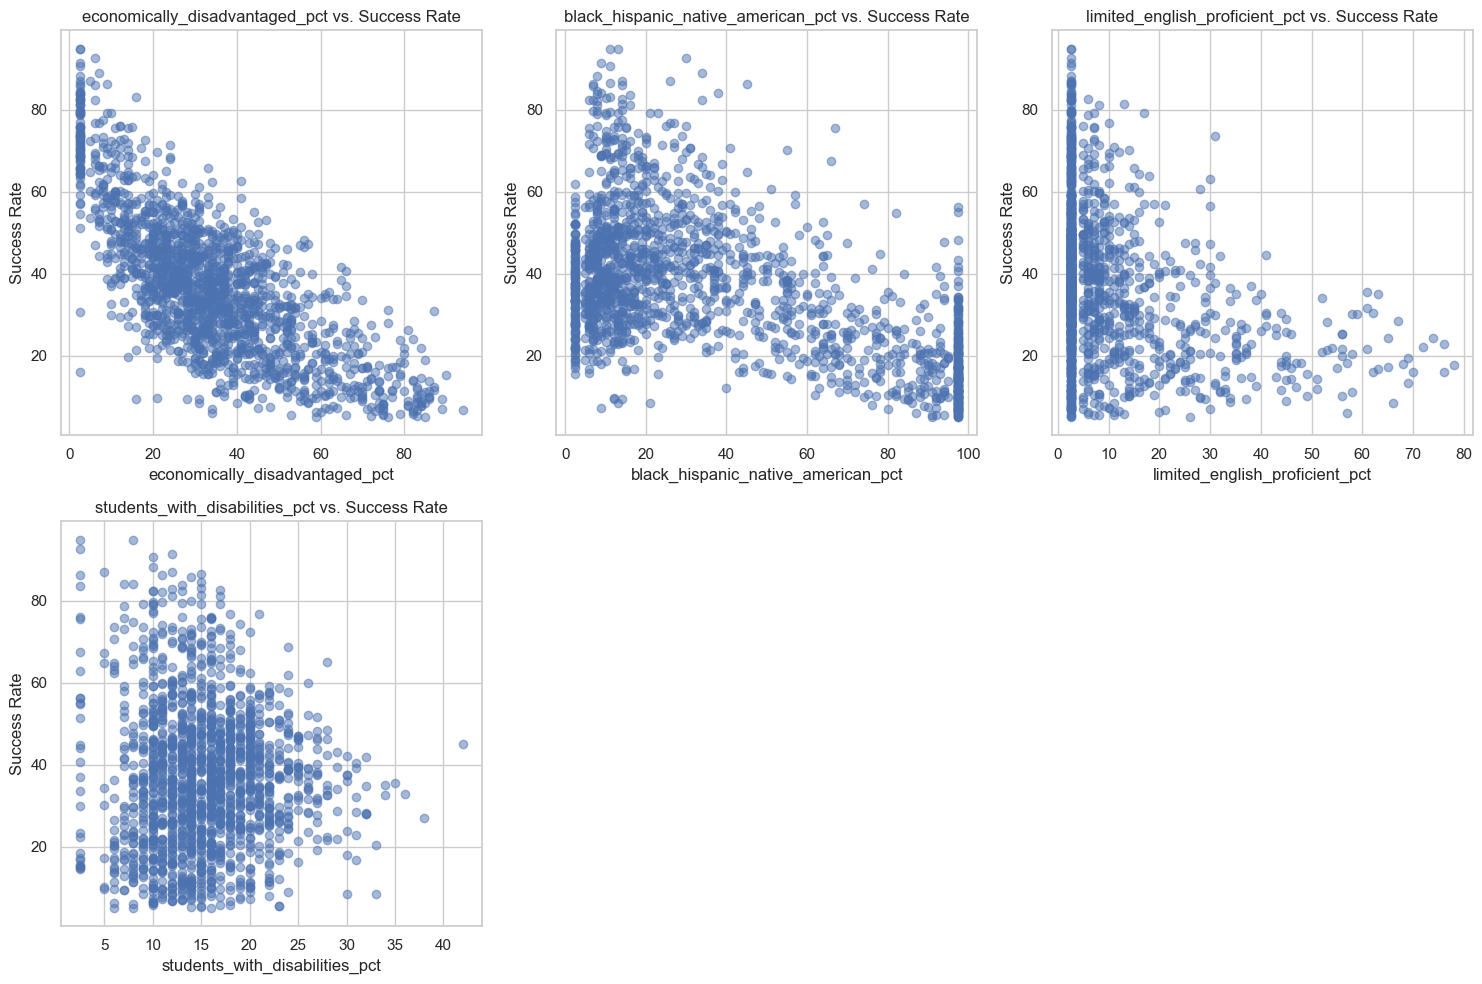

In [37]:
import matplotlib.pyplot as plt

# List of columns to compare
columns_to_compare = [
    'economically_disadvantaged_pct',
    'black_hispanic_native_american_pct',
    'limited_english_proficient_pct',
    'students_with_disabilities_pct'
]

# Create subplots for each comparison
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_compare, 1):
    plt.subplot(2, 3, i)
    plt.scatter(merged_df_cleaned[column], merged_df_cleaned['overall_success_rate_all_students'], alpha=0.5)
    plt.title(f'{column} vs. Success Rate')
    plt.xlabel(column)
    plt.ylabel('Success Rate')

plt.tight_layout()
plt.show()


In [38]:
from scipy.stats import pearsonr

# List of columns to compare
columns_to_compare = [
    'economically_disadvantaged_pct',
    'black_hispanic_native_american_pct',
    'homeless_pct',
    'limited_english_proficient_pct',
    'students_with_disabilities_pct'
]

# Convert columns to numeric data type and handle non-numeric values
for column in columns_to_compare:
    merged_df_cleaned[column] = pd.to_numeric(merged_df_cleaned[column], errors='coerce')

# Remove rows with NaN values in both columns
merged_df_cleaned = merged_df_cleaned.dropna(subset=columns_to_compare + ['overall_success_rate_all_students'])

# Calculate Pearson correlation for each column
correlation_values = {}

for column in columns_to_compare:
    correlation_coefficient, _ = pearsonr(merged_df_cleaned[column], merged_df_cleaned['overall_success_rate_all_students'])
    correlation_values[column] = correlation_coefficient

# Print correlation coefficients
for column, correlation_coefficient in correlation_values.items():
    print(f'Correlation between {column} and overall_success_rate_all_students: {correlation_coefficient:.4f}')


Correlation between economically_disadvantaged_pct and overall_success_rate_all_students: -0.7366
Correlation between black_hispanic_native_american_pct and overall_success_rate_all_students: -0.6052
Correlation between homeless_pct and overall_success_rate_all_students: -0.1588
Correlation between limited_english_proficient_pct and overall_success_rate_all_students: -0.2950
Correlation between students_with_disabilities_pct and overall_success_rate_all_students: 0.0169


/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_31626/997720245.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned[column] = pd.to_numeric(merged_df_cleaned[column], errors='coerce')


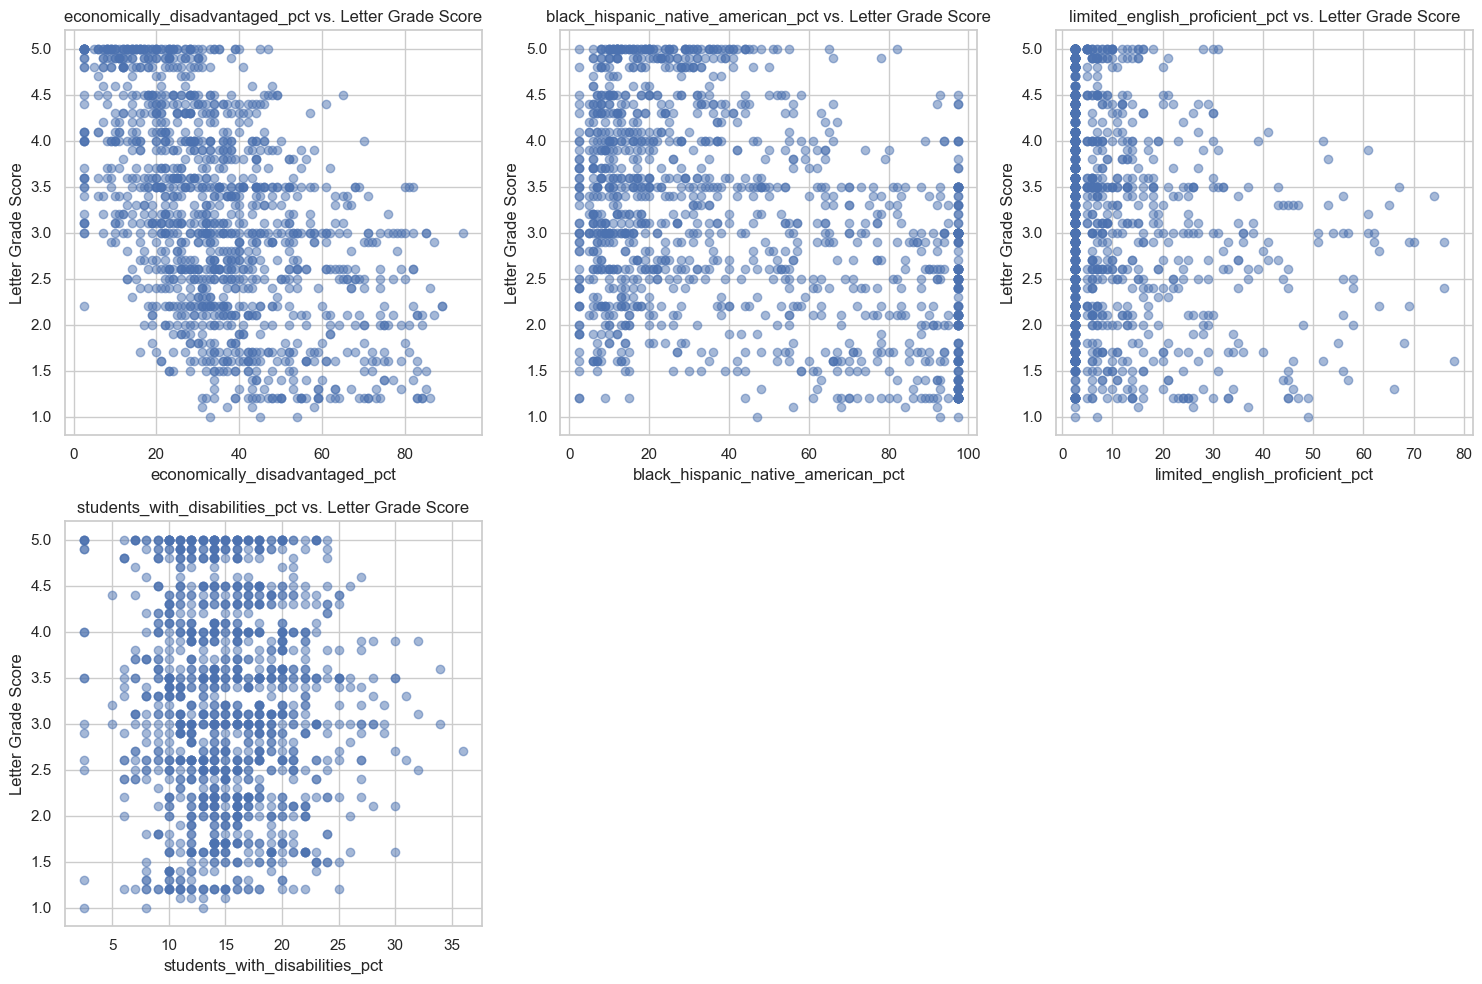

In [39]:
import matplotlib.pyplot as plt

# List of columns to compare
columns_to_compare = [
    'economically_disadvantaged_pct',
    'black_hispanic_native_american_pct',
    'limited_english_proficient_pct',
    'students_with_disabilities_pct'
]

# Create subplots for each comparison
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_compare, 1):
    plt.subplot(2, 3, i)
    plt.scatter(merged_df_cleaned[column], merged_df_cleaned['lg_score'], alpha=0.5)
    plt.title(f'{column} vs. Letter Grade Score')
    plt.xlabel(column)
    plt.ylabel('Letter Grade Score')

plt.tight_layout()
plt.show()


In [40]:
from scipy.stats import pearsonr

# List of columns to compare
columns_to_compare = [
    'economically_disadvantaged_pct',
    'black_hispanic_native_american_pct',
    'limited_english_proficient_pct',
    'students_with_disabilities_pct'
]

# Convert columns to numeric data type and handle non-numeric values
for column in columns_to_compare:
    merged_df_cleaned[column] = pd.to_numeric(merged_df_cleaned[column], errors='coerce')

# Remove rows with NaN values in both columns
merged_df_cleaned = merged_df_cleaned.dropna(subset=columns_to_compare + ['lg_score'])

# Calculate Pearson correlation for each column
correlation_values = {}

for column in columns_to_compare:
    correlation_coefficient, _ = pearsonr(merged_df_cleaned[column], merged_df_cleaned['lg_score'])
    correlation_values[column] = correlation_coefficient

# Print correlation coefficients
for column, correlation_coefficient in correlation_values.items():
    print(f'Correlation between {column} and Letter Grade Score: {correlation_coefficient:.4f}')


Correlation between economically_disadvantaged_pct and Letter Grade Score: -0.5199
Correlation between black_hispanic_native_american_pct and Letter Grade Score: -0.4052
Correlation between limited_english_proficient_pct and Letter Grade Score: -0.1949
Correlation between students_with_disabilities_pct and Letter Grade Score: -0.0352


/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_31626/4289072739.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned[column] = pd.to_numeric(merged_df_cleaned[column], errors='coerce')


In [41]:
# Grouping the data by 'lg_grade' and calculating the mean economically disadvantaged percentage
mean_economically_disadvantaged_by_grade = merged_df_cleaned.groupby('lg_grade')['economically_disadvantaged_pct'].mean()

mean_economically_disadvantaged_by_grade


lg_grade
A    19.291667
B    29.523529
C    37.986284
D    43.432971
F    56.126761
Name: economically_disadvantaged_pct, dtype: float64

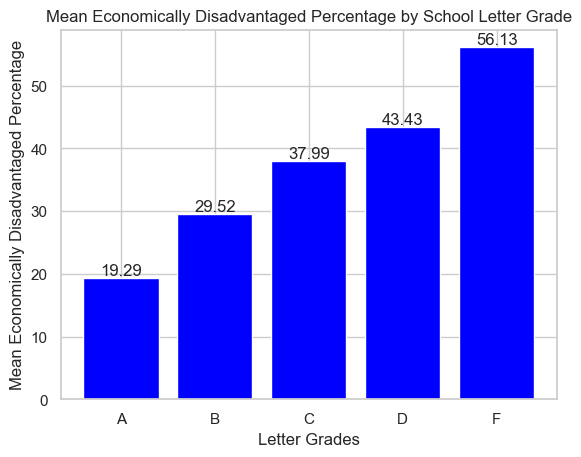

In [42]:
import matplotlib.pyplot as plt

# Grouping the data by 'lg_grade' and calculating the mean economically disadvantaged percentage
mean_economically_disadvantaged_by_grade = merged_df_cleaned.groupby('lg_grade')['economically_disadvantaged_pct'].mean()

# Sorting the index if you want the grades in a specific order
mean_economically_disadvantaged_by_grade = mean_economically_disadvantaged_by_grade.reindex(['A', 'B', 'C', 'D', 'F'])

# Creating the bar chart
bars = plt.bar(mean_economically_disadvantaged_by_grade.index, mean_economically_disadvantaged_by_grade.values, color='blue')

# Adding data labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

plt.xlabel('Letter Grades')
plt.ylabel('Mean Economically Disadvantaged Percentage')
plt.title('Mean Economically Disadvantaged Percentage by School Letter Grade')
plt.show()


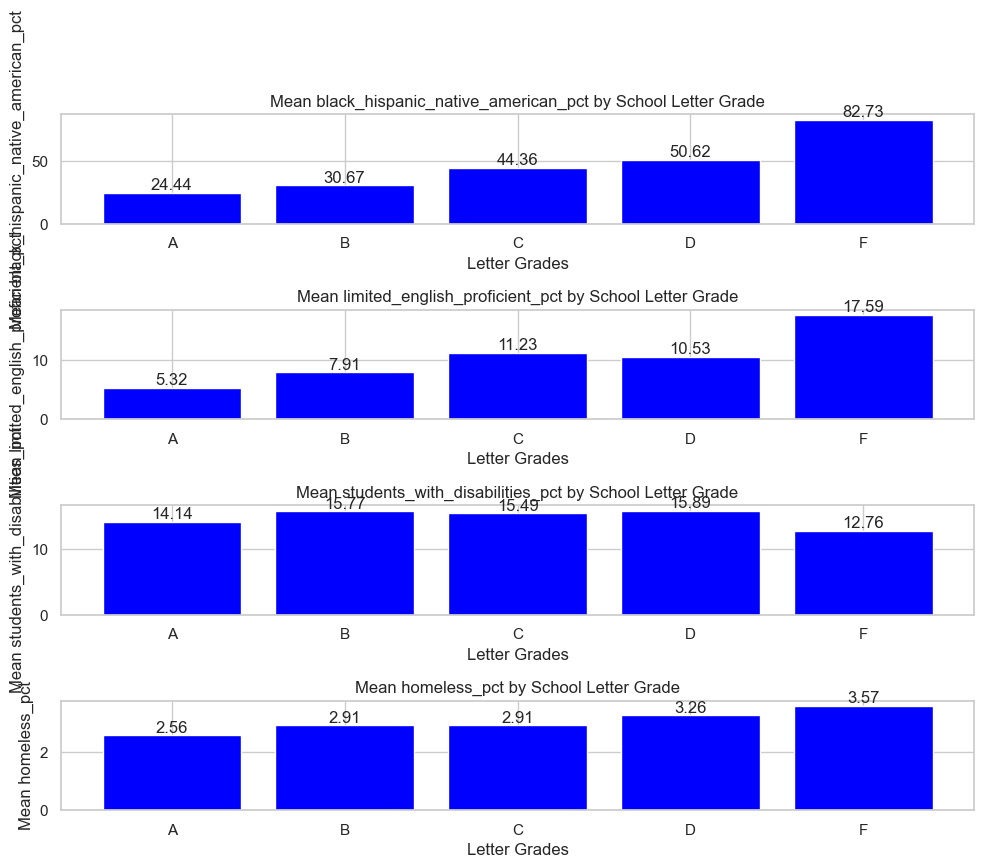

In [43]:
import matplotlib.pyplot as plt

# List of columns to compare
columns_to_compare = [
    'black_hispanic_native_american_pct',
    'limited_english_proficient_pct',
    'students_with_disabilities_pct',
    'homeless_pct'
]

# Create subplots for each column
fig, axs = plt.subplots(len(columns_to_compare), figsize=(10, 8))

# Loop through columns and create bar charts
for i, column in enumerate(columns_to_compare):
    # Grouping the data by 'lg_grade' and calculating the mean for the current column
    mean_by_grade = merged_df_cleaned.groupby('lg_grade')[column].mean()

    # Sorting the index if you want the grades in a specific order
    mean_by_grade = mean_by_grade.reindex(['A', 'B', 'C', 'D', 'F'])

    # Creating the bar chart for the current column
    bars = axs[i].bar(mean_by_grade.index, mean_by_grade.values, color='blue')

    # Adding data labels to each bar
    for bar in bars:
        yval = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

    axs[i].set_xlabel('Letter Grades')
    axs[i].set_ylabel(f'Mean {column}')
    axs[i].set_title(f'Mean {column} by School Letter Grade')

plt.tight_layout()
plt.show()



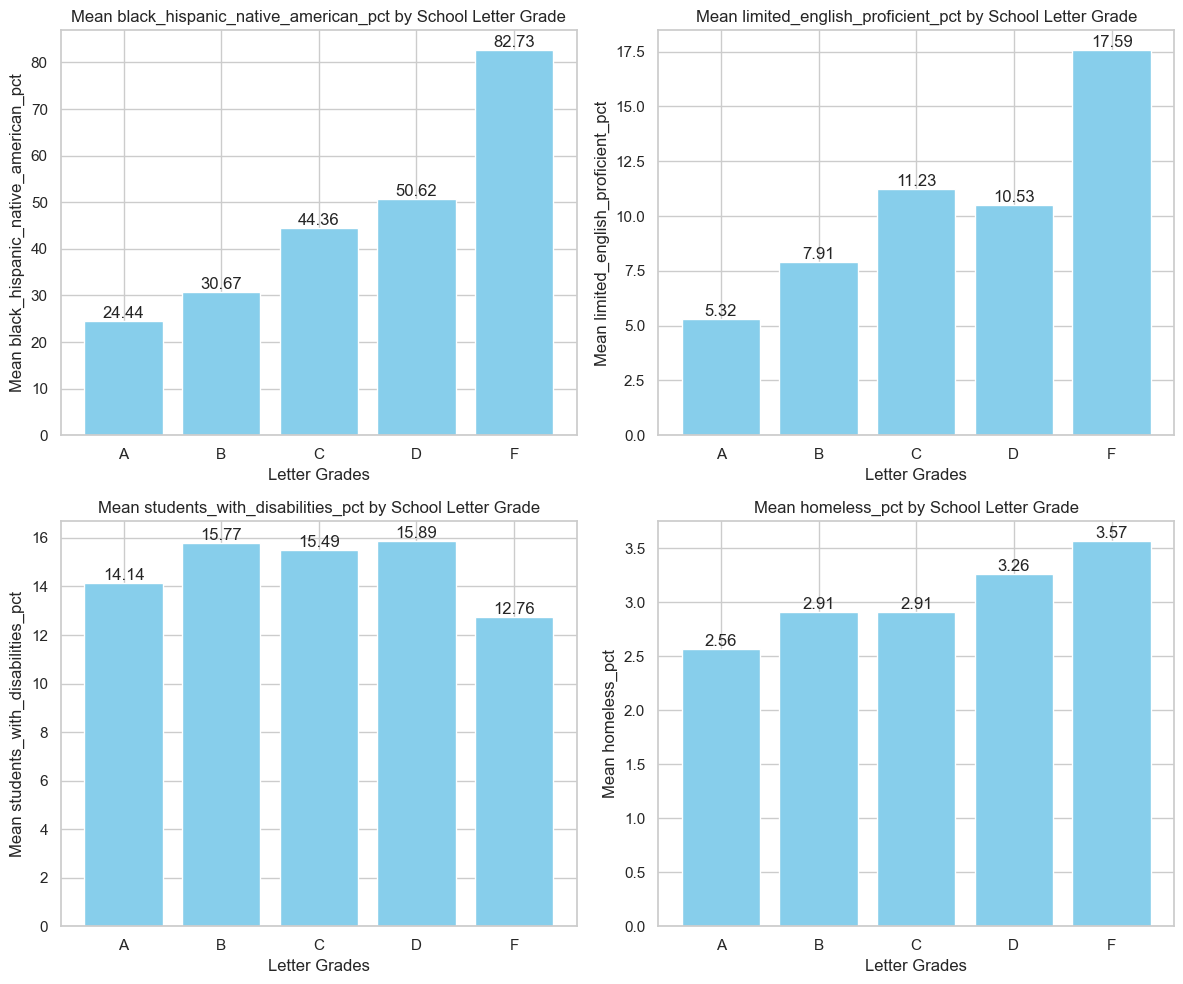

In [44]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Adjusted for a 2x2 grid
axs = axs.flatten()  # Flatten the 2x2 array for easy indexing

# Loop through columns and create bar charts
for i, column in enumerate(columns_to_compare):
    # Grouping the data by 'lg_grade' and calculating the mean for the current column
    mean_by_grade = merged_df_cleaned.groupby('lg_grade')[column].mean()

    # Sorting the index if you want the grades in a specific order
    mean_by_grade = mean_by_grade.reindex(['A', 'B', 'C', 'D', 'F'])

    # Creating the bar chart for the current column
    bars = axs[i].bar(mean_by_grade.index, mean_by_grade.values, color='skyblue')  # Changed color for a softer tone

    # Adding data labels to each bar
    for bar in bars:
        yval = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

    axs[i].set_xlabel('Letter Grades')
    axs[i].set_ylabel(f'Mean {column}')
    axs[i].set_title(f'Mean {column} by School Letter Grade')

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()


In [45]:
# Grouping the data by 'lg_grade' and calculating the mean economically disadvantaged percentage
mean_bhn_by_grade = merged_df_cleaned.groupby('lg_grade')['black_hispanic_native_american_pct'].mean()

mean_bhn_by_grade


lg_grade
A    24.435185
B    30.672059
C    44.364090
D    50.623188
F    82.732394
Name: black_hispanic_native_american_pct, dtype: float64

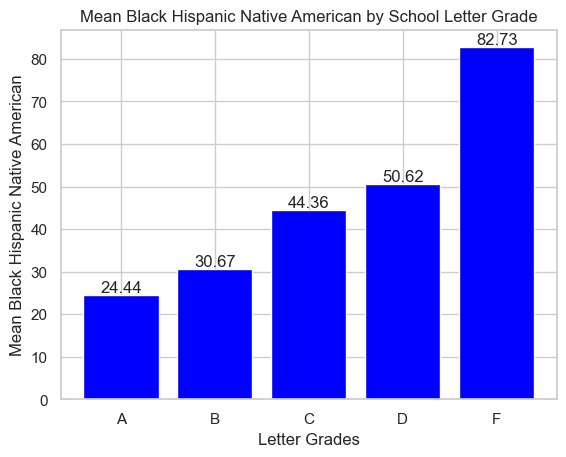

In [46]:
# Sorting the index if you want the grades in a specific order
mean_bhn_by_grade = mean_bhn_by_grade.reindex(['A', 'B', 'C', 'D', 'F'])

# Creating the bar chart
bars = plt.bar(mean_bhn_by_grade.index, mean_bhn_by_grade.values, color='blue')

# Adding data labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

plt.xlabel('Letter Grades')
plt.ylabel('Mean Black Hispanic Native American')
plt.title('Mean Black Hispanic Native American by School Letter Grade')
plt.show()

In [47]:
# Grouping the data by 'lg_grade' and calculating the mean economically disadvantaged percentage
mean_swd_by_grade = merged_df_cleaned.groupby('lg_grade')['students_with_disabilities_pct'].mean()

mean_swd_by_grade

lg_grade
A    14.138889
B    15.773529
C    15.491272
D    15.887681
F    12.760563
Name: students_with_disabilities_pct, dtype: float64

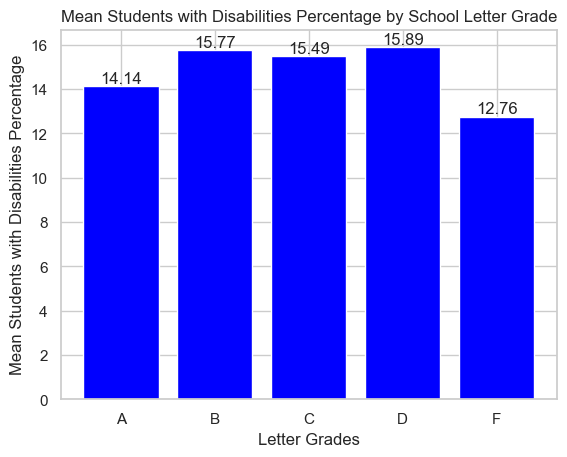

In [48]:
# Sorting the index if you want the grades in a specific order
mean_swd_by_grade = mean_swd_by_grade.reindex(['A', 'B', 'C', 'D', 'F'])

# Creating the bar chart
bars = plt.bar(mean_swd_by_grade.index, mean_swd_by_grade.values, color='blue')

# Adding data labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

plt.xlabel('Letter Grades')
plt.ylabel('Mean Students with Disabilities Percentage')
plt.title('Mean Students with Disabilities Percentage by School Letter Grade')
plt.show()

In [49]:
merged_df_cleaned.describe()

,system,school,ach_score,growth_score,growth25_score,lg_score,overall_success_rate_all_students,african_american_pct,asian_pct,black_hispanic_native_american_pct,economically_disadvantaged_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct
count,1304.000000,1304.000000,1304.000000,1304.000000,1293.000000,1304.000000,1304.000000,1302.000000,1131.000000,1304.000000,1304.000000,1304.000000,1304.000000,1303.000000,173.0,546.000000,1304.000000,989.000000,1304.000000,1296.000000
mean,530.709356,706.414110,3.196166,3.113497,3.395205,3.194632,35.723313,26.082565,3.248011,40.906825,34.823620,2.961273,9.581288,51.364543,2.5,3.387363,18.939034,2.502528,15.276074,57.217593
std,283.359035,1874.440581,1.398958,1.596524,1.184605,1.099118,16.623090,28.628587,2.779139,32.531954,18.777312,1.924076,12.835606,3.550529,0.0,3.691628,15.172275,0.079495,5.098012,32.177532
min,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.100000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,27.000000,2.5,2.500000,2.500000,2.500000,2.500000,2.500000
25%,272.000000,25.000000,2.000000,1.000000,3.000000,2.400000,24.050000,2.500000,2.500000,13.000000,22.000000,2.500000,2.500000,50.000000,2.5,2.500000,9.000000,2.500000,12.000000,30.000000
50%,570.000000,55.000000,3.000000,3.000000,3.000000,3.100000,34.800000,14.000000,2.500000,29.000000,32.000000,2.500000,2.500000,52.000000,2.5,2.500000,14.000000,2.500000,15.000000,68.000000
75%,792.000000,166.250000,4.000000,5.000000,4.000000,4.000000,46.000000,37.000000,2.500000,68.000000,44.250000,2.500000,11.000000,53.000000,2.5,2.500000,25.000000,2.500000,18.000000,86.000000
max,987.000000,8380.000000,5.000000,5.000000,5.000000,5.000000,94.800000,97.500000,51.000000,97.500000,94.000000,31.000000,78.000000,97.500000,2.5,30.000000,84.000000,5.000000,36.000000,97.500000


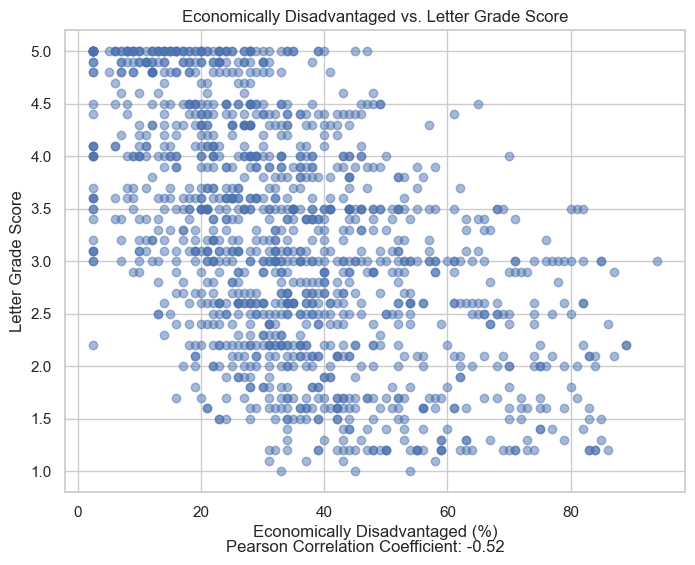

In [50]:
# Scatter plot of economically disadvantaged vs. letter grade score
plt.figure(figsize=(8, 6))
plt.scatter(merged_df_cleaned['economically_disadvantaged_pct'], merged_df_cleaned['lg_score'], alpha=0.5)
plt.title('Economically Disadvantaged vs. Letter Grade Score')
plt.xlabel('Economically Disadvantaged (%)')
plt.ylabel('Letter Grade Score')
plt.grid(True)

# Calculate and print Pearson correlation coefficient
pearson_corr = np.corrcoef(merged_df_cleaned['economically_disadvantaged_pct'], merged_df_cleaned['lg_score'])[0, 1]
plt.figtext(0.5, 0.01, f'Pearson Correlation Coefficient: {pearson_corr:.2f}', ha='center', fontsize=12)

plt.show()

In [51]:
from scipy.stats import pearsonr

# Calculate Pearson's correlation coefficient and the p-value
corr_coefficient, p_value = pearsonr(merged_df_cleaned['economically_disadvantaged_pct'], merged_df_cleaned['lg_score'])

corr_coefficient, p_value

(-0.51987826516676, 3.507731290860377e-91)

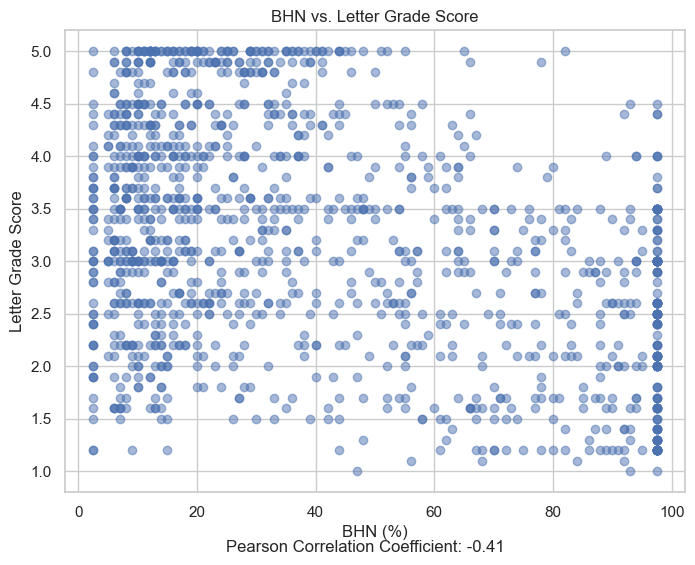

In [52]:
# Scatter plot of economically disadvantaged vs. letter grade score
plt.figure(figsize=(8, 6))
plt.scatter(merged_df_cleaned['black_hispanic_native_american_pct'], merged_df_cleaned['lg_score'], alpha=0.5)
plt.title('BHN vs. Letter Grade Score')
plt.xlabel('BHN (%)')
plt.ylabel('Letter Grade Score')
plt.grid(True)

# Calculate and print Pearson correlation coefficient
pearson_corr = np.corrcoef(merged_df_cleaned['black_hispanic_native_american_pct'], merged_df_cleaned['lg_score'])[0, 1]
plt.figtext(0.5, 0.01, f'Pearson Correlation Coefficient: {pearson_corr:.2f}', ha='center', fontsize=12)

plt.show()

In [53]:
from scipy.stats import pearsonr

# Calculate Pearson's correlation coefficient and the p-value
corr_coefficient, p_value = pearsonr(merged_df_cleaned['black_hispanic_native_american_pct'], merged_df_cleaned['lg_score'])

corr_coefficient, p_value

(-0.4052250535247495, 1.0503461649764771e-52)

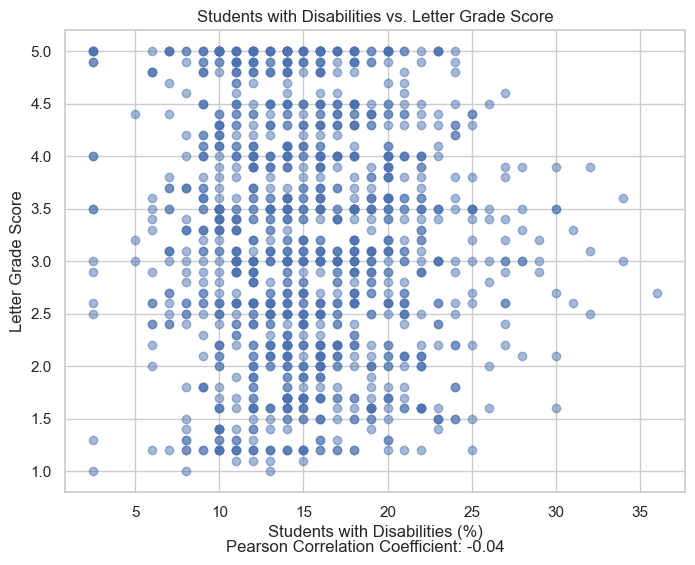

In [54]:
# Scatter plot of economically disadvantaged vs. letter grade score
plt.figure(figsize=(8, 6))
plt.scatter(merged_df_cleaned['students_with_disabilities_pct'], merged_df_cleaned['lg_score'], alpha=0.5)
plt.title('Students with Disabilities vs. Letter Grade Score')
plt.xlabel('Students with Disabilities (%)')
plt.ylabel('Letter Grade Score')
plt.grid(True)

# Calculate and print Pearson correlation coefficient
pearson_corr = np.corrcoef(merged_df_cleaned['students_with_disabilities_pct'], merged_df_cleaned['lg_score'])[0, 1]
plt.figtext(0.5, 0.01, f'Pearson Correlation Coefficient: {pearson_corr:.2f}', ha='center', fontsize=12)

plt.show()

In [55]:
from scipy.stats import pearsonr

# Calculate Pearson's correlation coefficient and the p-value
corr_coefficient, p_value = pearsonr(merged_df_cleaned['students_with_disabilities_pct'], merged_df_cleaned['lg_score'])

corr_coefficient, p_value

(-0.03518877157187453, 0.20412941568069978)

In [56]:
merged_df_cleaned.columns

Index(['system', 'school', 'ach_score', 'growth_score', 'growth25_score',
       'ccr_score', 'lg_score', 'lg_grade',
       'overall_success_rate_all_students', 'overall_success_rate_ed',
       'overall_success_rate_el', 'overall_success_rate_swd',
       'growth_numeracy_score', 'growth_literacy_score',
       'growth_science_score', 'growth_social_studies_score',
       'growth_ela_math_score_bhn', 'growth_ela_math_score_ed',
       'growth_ela_math_score_el', 'growth_ela_math_score_swd', 'ccr_rate',
       'ccr_act_rate', 'ccr_postsec_rate', 'ccr_ic_rate', 'ccr_asvab_rate',
       'ccr_rate_ed', 'ccr_rate_el', 'ccr_rate_swd', 'primary_key', 'total',
       'african_american_pct', 'asian_pct',
       'black_hispanic_native_american_pct', 'economically_disadvantaged_pct',
       'homeless_pct', 'limited_english_proficient_pct', 'male_pct',
       'migrant_pct', 'military_pct', 'multirace_pct', 'native_american_pct',
       'students_with_disabilities_pct', 'white_pct'],
      dtype=

In [57]:
merged_df_cleaned = merged_df_cleaned.replace('<5%', 2.5)
merged_df_cleaned = merged_df_cleaned.replace('Insufficient N Count', 2.5)


In [58]:
#Data Cleaning - Remove Not Eligibles
merged_df_cleaned = merged_df_cleaned[merged_df_cleaned['lg_grade'] != 'Not Eligible for a Letter Grade']
merged_df_cleaned.head()

,system,school,ach_score,growth_score,growth25_score,ccr_score,lg_score,lg_grade,overall_success_rate_all_students,overall_success_rate_ed,...,economically_disadvantaged_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct
0,10,2,4.0,3,3.0,5,3.7,B,34.2,21.1,...,21.0,2.5,2.5,54.0,NaN,NaN,2.5,2.5,15.0,93.0
1,10,5,5.0,4,3.0,Not a High School,4.4,B,52.2,45.4,...,27.0,2.5,2.5,49.0,NaN,NaN,5.0,2.5,20.0,92.0
3,10,15,3.0,5,3.0,Not a High School,3.8,B,33.6,28.4,...,44.0,2.5,9.0,50.0,NaN,NaN,14.0,NaN,20.0,82.0
4,10,20,3.0,1,3.0,Not a High School,2.2,D,30.1,20.1,...,36.0,2.5,2.5,50.0,NaN,NaN,9.0,2.5,14.0,87.0
5,10,25,4.0,5,2.0,4,4.1,B,33.7,23.1,...,30.0,2.5,2.5,51.0,NaN,NaN,9.0,2.5,15.0,86.0


In [59]:
merged_df_cleaned[['overall_success_rate_all_students', 'lg_score', 'growth_score', 'growth25_score']].describe()

,overall_success_rate_all_students,lg_score,growth_score,growth25_score
count,1304.000000,1304.000000,1304.000000,1293.000000
mean,35.723313,3.194632,3.113497,3.395205
std,16.623090,1.099118,1.596524,1.184605
min,5.100000,1.000000,1.000000,1.000000
25%,24.050000,2.400000,1.000000,3.000000
50%,34.800000,3.100000,3.000000,3.000000
75%,46.000000,4.000000,5.000000,4.000000
max,94.800000,5.000000,5.000000,5.000000


In [60]:
# Assuming 'merged_df_cleaned' is your actual DataFrame
# columns_to_remove and merged_df_cleaned are provided by you, used directly in your environment

# List of columns to be removed
columns_to_remove = ['ach_score', 'growth_score',
                     'growth25_score', 'ccr_score', 'lg_score', 'lg_grade', 'ccr_rate',
                     'ccr_act_rate', 'ccr_postsec_rate', 'ccr_ic_rate', 'ccr_asvab_rate',
                     'ccr_rate_ed', 'ccr_rate_el', 'ccr_rate_swd', 'primary_key', 'total']

# Define the features and the target variable
X = merged_df_cleaned.drop(columns_to_remove, axis=1)
y = merged_df_cleaned['lg_grade']

# Now let's export these DataFrames to CSV files
X.to_csv('/Users/jasonhorne/Letter_Grade_Data/X_file.csv', index=False)
y.to_csv('/Users/jasonhorne/Letter_Grade_Data/y_file.csv', index=False)


/Users/jasonhorne/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:2201: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


In [61]:
# List of columns to be removed
columns_to_remove = ['ach_score', 'growth_score',
                     'growth25_score', 'ccr_score', 'lg_score', 'lg_grade', 'ccr_rate',
                     'ccr_act_rate', 'ccr_postsec_rate', 'ccr_ic_rate', 'ccr_asvab_rate',
                     'ccr_rate_ed', 'ccr_rate_el', 'ccr_rate_swd', 'primary_key', 'total']
# Define the features and the target variable
X = merged_df_cleaned.drop(columns_to_remove, axis=1)  # Remove the brackets around columns_to_remove
y = merged_df_cleaned['lg_grade']  # Target variable
X.head()

,system,school,overall_success_rate_all_students,overall_success_rate_ed,overall_success_rate_el,overall_success_rate_swd,growth_numeracy_score,growth_literacy_score,growth_science_score,growth_social_studies_score,...,economically_disadvantaged_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct
0,10,2,34.2,21.1,2.5,2.5,5,1,5,2.5,...,21.0,2.5,2.5,54.0,NaN,NaN,2.5,2.5,15.0,93.0
1,10,5,52.2,45.4,2.5,2.5,5,3,4,2.5,...,27.0,2.5,2.5,49.0,NaN,NaN,5.0,2.5,20.0,92.0
3,10,15,33.6,28.4,2.5,13.9,3,4,5,2.5,...,44.0,2.5,9.0,50.0,NaN,NaN,14.0,NaN,20.0,82.0
4,10,20,30.1,20.1,2.5,9.5,1,2,1,1,...,36.0,2.5,2.5,50.0,NaN,NaN,9.0,2.5,14.0,87.0
5,10,25,33.7,23.1,2.5,8.8,5,1,3,2.5,...,30.0,2.5,2.5,51.0,NaN,NaN,9.0,2.5,15.0,86.0


In [62]:
value_map = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'F': 1}
y = y.map(value_map)
y

0       4
1       4
3       4
4       2
5       4
       ..
1680    1
1683    4
1687    3
1688    3
1689    4
Name: lg_grade, Length: 1304, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Coefficients
coefficients = logreg.coef_
# Intercepts
intercepts = logreg.intercept_

# If you need to print or use the coefficients and intercepts, you can uncomment the following lines:
print("Coefficients of the model:")
print(coefficients)
print("Intercepts of the model:")
print(intercepts)

# Note: This code assumes all features in 'df' are numerical except for 'lg_grade'.
# Run this in your local Python environment where 'df' is defined.


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Coefficients
coefficients = logreg.coef_
# Intercepts
intercepts = logreg.intercept_

# If you need to print or use the coefficients and intercepts, you can uncomment the following lines:
print("Coefficients of the model:")
print(coefficients)
print("Intercepts of the model:")
print(intercepts)


              precision    recall  f1-score   support

           1       0.72      0.65      0.68        20
           2       0.81      0.77      0.79        83
           3       0.78      0.74      0.76       135
           4       0.65      0.75      0.70       100
           5       0.79      0.76      0.77        54

    accuracy                           0.75       392
   macro avg       0.75      0.73      0.74       392
weighted avg       0.75      0.75      0.75       392

Coefficients of the model:
[[-2.50296781e-01  3.95076491e-01 -4.08663138e+00 -1.97317573e+00
   5.09359096e-01  4.43868516e-01 -1.32165115e+00 -1.44497995e+00
  -1.50622827e+00 -1.39677640e+00 -1.24142466e+00 -1.17896132e+00
   1.04969388e-01 -1.07695157e-01  2.69228001e-01  3.96543425e-02
   5.05182971e-02  9.62324250e-01  9.13400492e-02  5.73769610e-01
  -1.11748656e-01  0.00000000e+00 -1.90120219e-01  1.06178774e-01
   4.50856385e-02  9.90953493e-02 -1.09686760e-01]
 [-2.12933447e-01  2.52309806e-01 -2.

In [65]:
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model
logreg_cv = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logreg_cv, X_scaled, y, cv=5)

# Display the cross-validation scores
cv_scores



array([0.72796935, 0.72796935, 0.62835249, 0.72030651, 0.65769231])

In [66]:
# Assuming 'logreg_cv' is your trained Logistic Regression model and 'X' has the feature names
feature_names = X.columns
importances = logreg.coef_

for i in range(importances.shape[0]):
    print(f"Class {i}:")
    class_importances = importances[i]
    sorted_indices = np.argsort(np.abs(class_importances))[::-1]
    for idx in sorted_indices:
        print(f"{feature_names[idx]}: {class_importances[idx]}")
    print("\n")


Class 0:
overall_success_rate_all_students: -4.086631379708626
overall_success_rate_ed: -1.9731757347119598
growth_science_score: -1.506228270435703
growth_literacy_score: -1.4449799523560938
growth_social_studies_score: -1.3967764031058536
growth_numeracy_score: -1.32165114658052
growth_ela_math_score_bhn: -1.2414246582322013
growth_ela_math_score_ed: -1.1789613179260716
economically_disadvantaged_pct: 0.962324250065775
limited_english_proficient_pct: 0.5737696098214282
overall_success_rate_el: 0.5093590960969111
overall_success_rate_swd: 0.4438685157849466
school: 0.39507649068123707
african_american_pct: 0.26922800074217856
system: -0.2502967812788899
military_pct: -0.19012021894468037
male_pct: -0.11174865566105492
white_pct: -0.10968676034728252
growth_ela_math_score_swd: -0.107695156658482
multirace_pct: 0.10617877442551067
growth_ela_math_score_el: 0.10496938799107557
students_with_disabilities_pct: 0.09909534925423205
homeless_pct: 0.09134004921904715
black_hispanic_native_amer

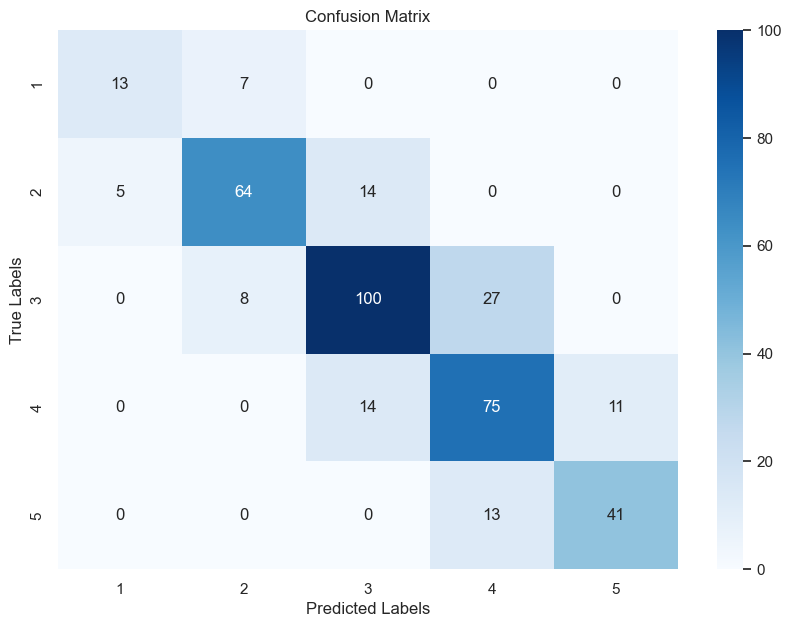

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have y_test and y_pred from the previous model predictions
# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



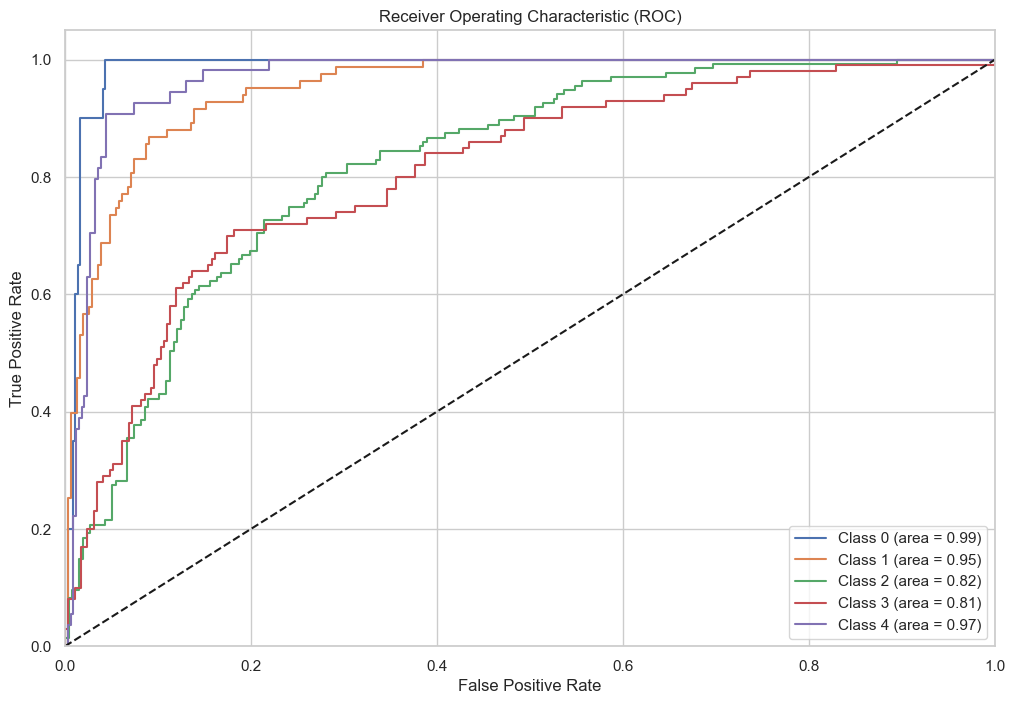

{0: 0.9866935483870968,
 1: 0.9523531017272975,
 2: 0.8231733679204497,
 3: 0.8096917808219177,
 4: 0.9684418145956608}

In [68]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Binarize the y labels to use with ROC AUC
y_binarized = label_binarize(y, classes=sorted(set(y)))
y_test_binarized = label_binarize(y_test, classes=sorted(set(y)))

# Initialize the OneVsRestClassifier with a LogisticRegression estimator
logreg_roc = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))

# Fit the model
logreg_roc.fit(X_train, y_train)

# Predict probabilities for each class
y_pred_prob = logreg_roc.predict_proba(X_test)

# Calculate ROC AUC for each class
roc_auc = {}
for i in range(y_binarized.shape[1]):
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(12, 8))
for i in range(y_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Return the dictionary of ROC AUC scores
roc_auc


In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)  # Enable probability for ROC AUC

# Dictionary to hold models
models = {
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'Gradient Boosting': gradient_boosting,
    'Support Vector Machine': svm
}

# Dictionary to hold results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Predict probabilities for ROC AUC
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)
    else:  # Use decision function for SVM
        y_pred_prob = model.decision_function(X_test)
        
        # Binarize y_test for ROC AUC
        y_test_binarized = label_binarize(y_test, classes=sorted(set(y)))
        
        # Compute ROC AUC for each class in one-vs-rest fashion
        roc_auc = {}
        for i in range(y_binarized.shape[1]):
            roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'ROC AUC': roc_auc
    }

results


{'Decision Tree': {'Accuracy': 0.6428571428571429,
  'ROC AUC': {0: 0.9866935483870968,
   1: 0.9523531017272975,
   2: 0.8231733679204497,
   3: 0.8096917808219177,
   4: 0.9684418145956608}},
 'Random Forest': {'Accuracy': 0.75,
  'ROC AUC': {0: 0.9866935483870968,
   1: 0.9523531017272975,
   2: 0.8231733679204497,
   3: 0.8096917808219177,
   4: 0.9684418145956608}},
 'Gradient Boosting': {'Accuracy': 0.7270408163265306,
  'ROC AUC': {0: 0.9866935483870968,
   1: 0.9523531017272975,
   2: 0.8231733679204497,
   3: 0.8096917808219177,
   4: 0.9684418145956608}},
 'Support Vector Machine': {'Accuracy': 0.7551020408163265,
  'ROC AUC': {0: 0.9866935483870968,
   1: 0.9523531017272975,
   2: 0.8231733679204497,
   3: 0.8096917808219177,
   4: 0.9684418145956608}}}

In [70]:
from sklearn.metrics import precision_recall_fscore_support

# Dictionary to hold precision, recall, and F1 scores for each model
precision_recall_f1_scores = {}

# Calculate precision, recall, and F1 scores for each model
for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate precision, recall, and F1 scores
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    # Store results
    precision_recall_f1_scores[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': fscore
    }

precision_recall_f1_scores



{'Decision Tree': {'Precision': 0.647081978395754,
  'Recall': 0.6428571428571429,
  'F1 Score': 0.6436363852146406},
 'Random Forest': {'Precision': 0.7537973941280798,
  'Recall': 0.75,
  'F1 Score': 0.7503948273981814},
 'Gradient Boosting': {'Precision': 0.7287057509825307,
  'Recall': 0.7270408163265306,
  'F1 Score': 0.7266413803880439},
 'Support Vector Machine': {'Precision': 0.7578935215193155,
  'Recall': 0.7551020408163265,
  'F1 Score': 0.7556954741041566}}

In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have the predictions from the logistic regression model stored in y_pred_logreg
# Replace 'y_pred_logreg' with the actual predictions variable from your logistic regression model
y_pred_logreg = logreg_roc.predict(X_test)  # Replace with your actual logistic regression predictions

# Calculate precision, recall, and F1 scores for logistic regression
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_score_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

# Create a dictionary to store the scores
logreg_scores = {
    'Precision': precision_logreg,
    'Recall': recall_logreg,
    'F1 Score': f1_score_logreg
}

logreg_scores



{'Precision': 0.6941739380528437,
 'Recall': 0.6887755102040817,
 'F1 Score': 0.6891749808406067}

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
grid_search.best_params_


Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5]
}

# Create a base model for Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Instantiate the grid search model
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid, 
                               cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search_gb.fit(X_train, y_train)

# Best parameters for Gradient Boosting
best_params_gb = grid_search_gb.best_params_


Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [81]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create a DataFrame for feature names
X_train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])

# Initialize models with their respective hyperparameter grids
models = {
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [100],
        'max_depth': [20],
        'min_samples_split': [2],
        'min_samples_leaf': [1]
    }),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [3]
    })
}

# Dictionary to hold results and feature importances
results = {}
feature_importances = {}

# Train and evaluate each model with hyperparameter tuning
for name, (model, param_grid) in models.items():
    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train_encoded)
    
    # Get the best estimator after hyperparameter tuning
    best_model = grid_search.best_estimator_
    
    # Train the best model
    best_model.fit(X_train, y_train_encoded)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate feature importance if the model has this attribute
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X_train_df.columns, 
            'importance': np.round(best_model.feature_importances_, 3)
        })
        feature_importances[name] = feature_importance

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    roc_auc = roc_auc_score(y_test_encoded, best_model.predict_proba(X_test), average='weighted', multi_class='ovr')
    precision = precision_score(y_test_encoded, y_pred, average='weighted')
    recall = recall_score(y_test_encoded, y_pred, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Display results and feature importances
print("Model Evaluation Results:")
print(results)

print("\nFeature Importances:")
for model_name, importance_df in feature_importances.items():
    print(f"\n{model_name} Feature Importance:")
    print(importance_df)


Model Evaluation Results:
{'Random Forest': {'Accuracy': 0.7474489795918368, 'ROC AUC': 0.91962113249001, 'Precision': 0.750793911077733, 'Recall': 0.7474489795918368, 'F1 Score': 0.7482417616198275}, 'Gradient Boosting': {'Accuracy': 0.7270408163265306, 'ROC AUC': 0.9187662771968994, 'Precision': 0.7287057509825307, 'Recall': 0.7270408163265306, 'F1 Score': 0.7266413803880439}}

Feature Importances:

Random Forest Feature Importance:
       feature  importance
0    feature_0       0.027
1    feature_1       0.037
2    feature_2       0.176
3    feature_3       0.083
4    feature_4       0.011
5    feature_5       0.031
6    feature_6       0.076
7    feature_7       0.048
8    feature_8       0.045
9    feature_9       0.036
10  feature_10       0.043
11  feature_11       0.054
12  feature_12       0.013
13  feature_13       0.020
14  feature_14       0.029
15  feature_15       0.011
16  feature_16       0.041
17  feature_17       0.056
18  feature_18       0.004
19  feature_19       

In [83]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create DataFrames for feature names
X_train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
X_test_df = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])])

# Initialize models with their respective hyperparameter grids
models = {
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [100],
        'max_depth': [20],
        'min_samples_split': [2],
        'min_samples_leaf': [1]
    }),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [3]
    })
}

# Dictionary to hold results and feature importances
results = {}
feature_importances = {}

# Train and evaluate each model with hyperparameter tuning
for name, (model, param_grid) in models.items():
    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train_encoded)
    
    # Get the best estimator after hyperparameter tuning
    best_model = grid_search.best_estimator_
    
    # Train the best model
    best_model.fit(X_train, y_train_encoded)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate feature importance if the model has this attribute
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X_train_df.columns, 
            'importance': np.round(best_model.feature_importances_, 3)
        })
        feature_importances[name] = feature_importance

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    roc_auc = roc_auc_score(y_test_encoded, best_model.predict_proba(X_test), average='weighted', multi_class='ovr')
    precision = precision_score(y_test_encoded, y_pred, average='weighted')
    recall = recall_score(y_test_encoded, y_pred, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Display results and feature importances
print("Model Evaluation Results:")
print(results)

print("\nFeature Importances:")
for model_name, importance_df in feature_importances.items():
    print(f"\n{model_name} Feature Importance:")
    print(importance_df)


Model Evaluation Results:
{'Random Forest': {'Accuracy': 0.7474489795918368, 'ROC AUC': 0.91962113249001, 'Precision': 0.750793911077733, 'Recall': 0.7474489795918368, 'F1 Score': 0.7482417616198275}, 'Gradient Boosting': {'Accuracy': 0.7270408163265306, 'ROC AUC': 0.9187662771968994, 'Precision': 0.7287057509825307, 'Recall': 0.7270408163265306, 'F1 Score': 0.7266413803880439}}

Feature Importances:

Random Forest Feature Importance:
       feature  importance
0    feature_0       0.027
1    feature_1       0.037
2    feature_2       0.176
3    feature_3       0.083
4    feature_4       0.011
5    feature_5       0.031
6    feature_6       0.076
7    feature_7       0.048
8    feature_8       0.045
9    feature_9       0.036
10  feature_10       0.043
11  feature_11       0.054
12  feature_12       0.013
13  feature_13       0.020
14  feature_14       0.029
15  feature_15       0.011
16  feature_16       0.041
17  feature_17       0.056
18  feature_18       0.004
19  feature_19       

In [85]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train_encoded)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, best_model.predict_proba(X_test), average='weighted', multi_class='ovr')
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

# Print evaluation metrics
print("Model Evaluation Results:")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Model Evaluation Results:
Accuracy: 0.7295918367346939
ROC AUC: 0.917099835985132
Precision: 0.7336708951959704
Recall: 0.7295918367346939
F1 Score: 0.7306526451135743


In [86]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the Random Forest model with the best parameters
best_rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)
best_rf.fit(X_train, y_train_encoded)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, best_rf.predict_proba(X_test), average='weighted', multi_class='ovr')
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

# Print evaluation metrics
print("Model Evaluation Results:")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Model Evaluation Results:
Accuracy: 0.7295918367346939
ROC AUC: 0.917099835985132
Precision: 0.7336708951959704
Recall: 0.7295918367346939
F1 Score: 0.7306526451135743
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END boot

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_s

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_s

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import randint

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the parameter grid for Randomized Search
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train_encoded)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, best_model.predict_proba(X_test), average='weighted', multi_class='ovr')
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

# Print evaluation metrics
print("Model Evaluation Results:")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 179}
Model Evaluation Results:
Accuracy: 0.7321428571428571
ROC AUC: 0.920610424425396
Precision: 0.7377146587475116
Recall: 0.7321428571428571
F1 Score: 0.732932538094603


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 179}
Model Evaluation Results:
Accuracy: 0.7321428571428571
ROC AUC: 0.920610424425396
Precision: 0.7377146587475116
Recall: 0.7321428571428571
F1 Score: 0.732932538094603


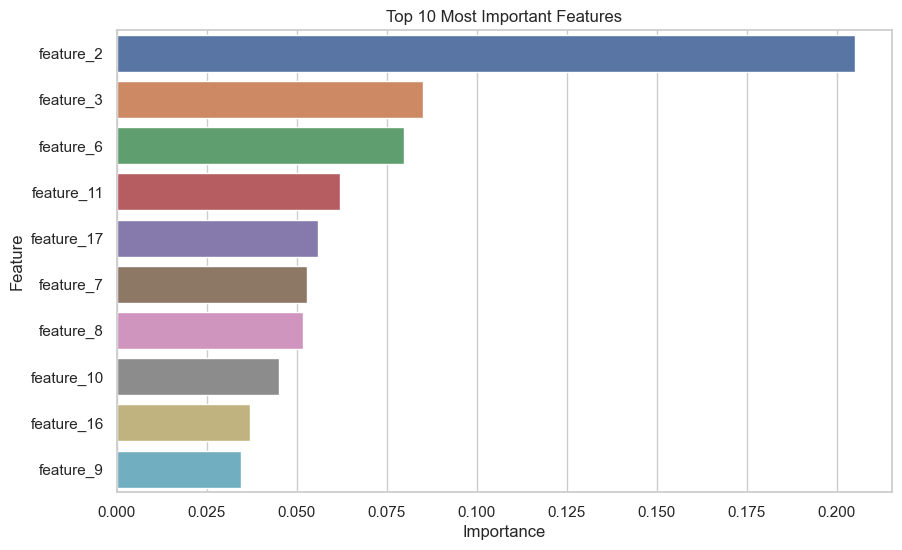

In [89]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the parameter grid for Randomized Search
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train_encoded)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, best_model.predict_proba(X_test), average='weighted', multi_class='ovr')
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

# Print evaluation metrics
print("Model Evaluation Results:")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Assuming X is a DataFrame and getting feature names
feature_names = [f'feature_{i}' for i in range(X.shape[1])]  # Replace this with X.columns if X is a DataFrame with named columns

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': best_model.feature_importances_})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
top_n = 10  # You can adjust this value to see more or fewer features
top_features = importance_df.head(top_n)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title(f'Top {top_n} Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [90]:
# Access the top N most important feature names
top_n_feature_names = importance_df.head(top_n)['Feature'].tolist()

# Print the list of top feature names
print(top_n_feature_names)



['feature_2', 'feature_3', 'feature_6', 'feature_11', 'feature_17', 'feature_7', 'feature_8', 'feature_10', 'feature_16', 'feature_9']


In [91]:
importance_df

,Feature,Importance
2,feature_2,0.205038
3,feature_3,0.085001
6,feature_6,0.079635
11,feature_11,0.061829
17,feature_17,0.055817
7,feature_7,0.052840
8,feature_8,0.051575
10,feature_10,0.045097
16,feature_16,0.036874
9,feature_9,0.034413


Feature: 0, Score: 0.00296
Feature: 1, Score: 0.00598
Feature: 2, Score: 0.00308
Feature: 3, Score: 0.00277
Feature: 4, Score: 0.52811
Feature: 5, Score: 0.42152
Feature: 6, Score: 0.02673
Feature: 7, Score: 0.00290
Feature: 8, Score: 0.00313
Feature: 9, Score: 0.00283


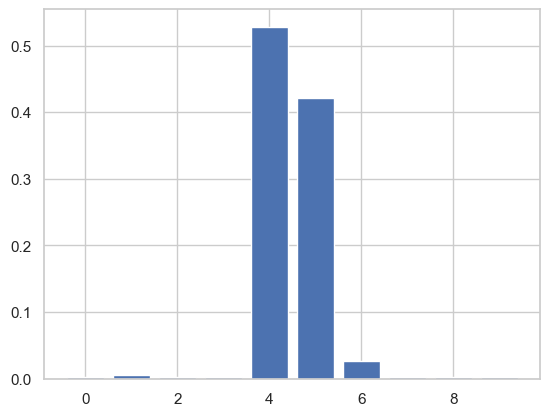

In [92]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


Feature: 0, Score: 0.00006
Feature: 1, Score: 0.00690
Feature: 2, Score: 0.00003
Feature: 3, Score: 0.00003
Feature: 4, Score: 0.53151
Feature: 5, Score: 0.42943
Feature: 6, Score: 0.03147
Feature: 7, Score: 0.00049
Feature: 8, Score: 0.00003
Feature: 9, Score: 0.00006


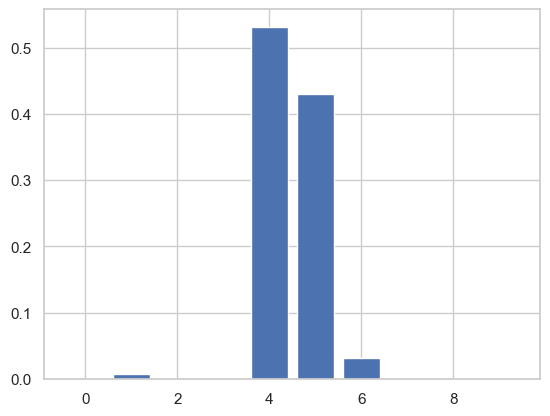

In [93]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# define the model
model = GradientBoostingRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


Feature: 0, Score: 0.15166
Feature: 1, Score: -0.56588
Feature: 2, Score: -0.47251
Feature: 3, Score: -0.14064
Feature: 4, Score: 0.06983
Feature: 5, Score: -0.74608
Feature: 6, Score: 0.12295
Feature: 7, Score: 0.04648
Feature: 8, Score: -0.24616
Feature: 9, Score: -0.22753


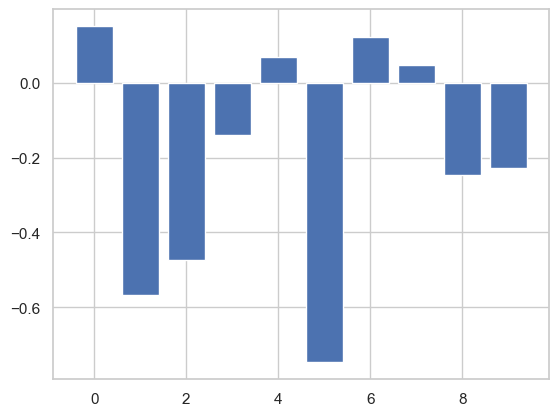

In [94]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# Define a classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# Define the logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(X, y)

# Get the coefficients (used as importance)
importance = model.coef_[0]

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

# Plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: -0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000


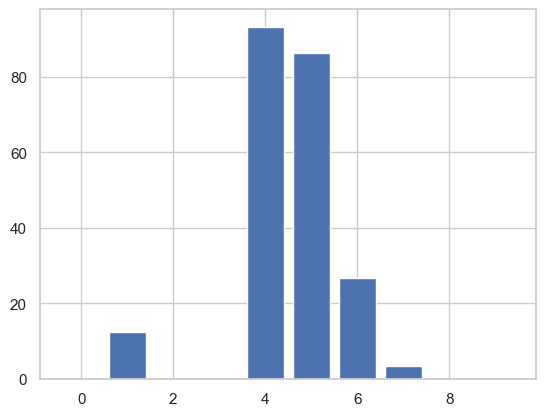

In [95]:

# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming X and y are already defined and suitable for a regression task

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
linreg = LinearRegression()

# Fit the model to the training data
linreg.fit(X_train, y_train)

# Predict on the test set
y_pred = linreg.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Coefficients
coefficients = linreg.coef_
# Intercept
intercept = linreg.intercept_

# Printing coefficients and intercept
print("Coefficients of the model:")
print(coefficients)
print("Intercept of the model:")
print(intercept)


Mean Squared Error: 1.5582756660058292e-26
Coefficients of the model:
[ 7.60410057e-14  1.27112028e+01 -7.10542736e-14 -1.42108547e-14
  9.47387081e+01  8.57087619e+01  2.68130114e+01  3.18291125e+00
 -1.27675648e-14  1.77635684e-14]
Intercept of the model:
2.143243543348881


In [97]:
X

array([[-2.02220122,  0.31563495,  0.82797464, ..., -0.50446586,
         0.23009474,  0.76201118],
       [ 0.71256194,  1.74103872, -1.21466535, ...,  1.04131149,
        -0.75850596,  0.74791592],
       [ 0.08338884,  0.92829021,  1.45167891, ...,  1.22393601,
         0.3416886 , -0.12517266],
       ...,
       [ 0.12182436,  0.74220833, -0.64488697, ..., -2.37934499,
         1.82039313, -1.55531804],
       [ 0.00820639, -0.89191578,  0.14747174, ..., -1.78611048,
         0.71238157, -1.07498942],
       [-0.43805451,  0.29078795,  0.17794556, ..., -0.18581086,
        -0.26120192,  0.8632634 ]])

In [98]:
target = y

In [99]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [100]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(X_std)

array([[ 1.2039497 , -0.20125461, -1.37550538, ...,  0.45139187,
        -0.3441842 , -0.31959931],
       [-1.48379944, -0.151876  ,  0.95293689, ...,  1.58044166,
        -0.49127601,  0.34228185],
       [ 0.70502306,  0.6834135 ,  0.2482604 , ..., -0.31819507,
        -0.3846019 ,  1.04978125],
       ...,
       [-1.70268142,  1.59670604, -1.71768953, ..., -1.23242719,
        -1.2210896 ,  0.04746074],
       [ 0.02808339,  0.62033448, -0.48477266, ..., -0.9491024 ,
         0.01937767, -0.57593218],
       [ 1.15118457, -0.29632753,  0.55855021, ...,  1.52648956,
        -0.56867146, -0.84837527]])

In [101]:
pca.n_components_

10

In [102]:
pca.explained_variance_ratio_

array([0.11913099, 0.11241922, 0.10849423, 0.10521719, 0.10131435,
       0.09833226, 0.09489379, 0.08973587, 0.08876148, 0.08170063])

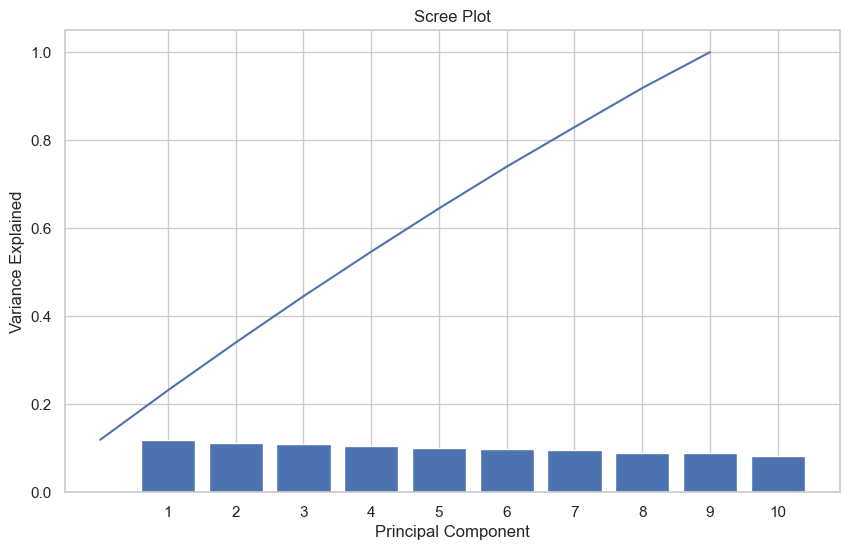

In [103]:
# Scree plot: Cumulative Explained Variance
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(range(1, pca.n_components_+1), pca.explained_variance_ratio_)
plt.xticks(range(1, pca.n_components_+1))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [104]:
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components that capture a specified percentage of variance
target_variance = 0.95  # Set your desired percentage here (e.g., 0.95 or 0.99)
num_components = np.argmax(cumulative_variance >= target_variance) + 1

print(f'The number of components to capture {target_variance * 100}% variance: {num_components}')

# Use the selected number of components for further analysis or dimensionality reduction
final_pca = PCA(n_components=num_components)
X_pca = final_pca.fit_transform(X)

The number of components to capture 95.0% variance: 10


In [105]:
pca = PCA(n_components=num_components)
scores = pca.fit_transform(X_std)

In [106]:
components = pca.components_.T
reduced_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
reduced_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.203950,-0.201255,-1.375505,0.660329,-1.694025,-1.312936,0.210578,0.451392,-0.344184,-0.319599
1,-1.483799,-0.151876,0.952937,0.211392,0.669217,-1.123508,0.875639,1.580442,-0.491276,0.342282
2,0.705023,0.683413,0.248260,0.533250,0.197394,-0.157447,1.497174,-0.318195,-0.384602,1.049781
3,-0.228828,0.155427,-0.028128,-0.212121,-0.730092,-0.292927,1.714925,0.222430,-0.870204,1.013220
4,-1.028268,-0.200417,0.345126,-1.669416,-0.654490,0.300392,-2.171594,-1.409883,0.175838,-0.151729
...,...,...,...,...,...,...,...,...,...,...
995,-0.385859,-1.012874,-0.217297,0.434204,0.275011,0.437695,1.524787,-1.226560,0.157871,-2.703832
996,0.300342,-0.665302,0.803322,1.315656,-0.618464,-0.048147,-0.402757,0.153539,0.396691,-1.529494
997,-1.702681,1.596706,-1.717690,-0.794403,0.486962,-0.157403,-1.747694,-1.232427,-1.221090,0.047461
998,0.028083,0.620334,-0.484773,-0.020993,-0.482169,1.350052,-1.920263,-0.949102,0.019378,-0.575932


In [108]:
value_map = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'F': 1}
y = y.map(value_map)
y

AttributeError: 'numpy.ndarray' object has no attribute 'map'

In [109]:
# Standardize the features
X_std = StandardScaler().fit_transform(X)

In [110]:
# Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [111]:
# fitting the logistic regression model to the training data
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression(solver='liblinear')
logre.fit(X_train,y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

[CV] END bootstrap=False, max_depth=30, min_samples_leaf=6, min_samples_split=3, n_estimators=137; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=268; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=133; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=7, min_samples_split=13, n_estimators=57; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=7, n_estimators=103; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=8, min_samples_split=15, n_estimators=264; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=8, min_samples_split=12, n_estimators=292; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=290; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, min_samples_l

[CV] END bootstrap=True, max_depth=30, min_samples_leaf=8, min_samples_split=5, n_estimators=153; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=268; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=9, min_samples_split=15, n_estimators=291; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=6, min_samples_split=19, n_estimators=267; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=58; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=82; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=148; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=6, min_samples_split=4, n_estimators=242; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_sample

[CV] END bootstrap=True, max_depth=30, min_samples_leaf=8, min_samples_split=5, n_estimators=153; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=13, n_estimators=107; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=278; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=133; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=15, n_estimators=144; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=8, min_samples_split=17, n_estimators=286; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=8, min_samples_split=13, n_estimators=211; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=7, min_samples_split=10, n_estimators=256; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_samples_

[CV] END bootstrap=False, max_depth=30, min_samples_leaf=6, min_samples_split=3, n_estimators=137; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=6, min_samples_split=3, n_estimators=241; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=5, min_samples_split=10, n_estimators=216; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=99; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=15, n_estimators=144; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=8, min_samples_split=17, n_estimators=286; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=148; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=6, min_samples_split=4, n_estimators=242; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, min_samples_l

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=8, min_samples_split=8, n_estimators=171; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=13, n_estimators=104; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=278; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=7, min_samples_split=13, n_estimators=57; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=99; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=15, n_estimators=144; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=5, min_samples_split=14, n_estimators=90; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=58; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_lea

In [ ]:
# predicting the class for the test data
y_pred = logre.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
y_test

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor

# Create MLP Classifier
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50),
                             activation='tanh',
                             solver='adam',
                             max_iter=10000,
                             alpha=0.0001,
                             random_state=42,
                             )

# Train the model
mlp_regressor.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

# Predictions
y_pred = mlp_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Perform Grid Search
grid_search = GridSearchCV(MLPRegressor(max_iter=2000, random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate model with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Best Model Mean Squared Error:", mse)

In [ ]:
from sklearn.neural_network import MLPRegressor

# Create MLP Classifier
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50),
                             activation='tanh',
                             solver='sgd',
                             max_iter=10000,
                             alpha=0.001,
                             random_state=42,
                             )

# Train the model
mlp_regressor.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

# Predictions
y_pred = mlp_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2